# Conclusion

Dataset contains stats accumulated for team vs. a unique team.

Decision tree classification with kfolds=5, and pruned parameter values found with `RandomizedSearchCV`.

## HOME_TEAM_WINS

Target to beat - 59.1% home winrate

Achieved - **64% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|64%|63%|63%|
|max_depth|64%|63%|63%|
|~~min_impurity_decrease~~|63%|60%|49%|
|max_leaf_nodes|61%|62%|60%|
|max_features|64%|64%|63%|

## HOME_HIGHER_FG_PCT

Target to beat - 55.0% rate of home having higher FGP

Achieved - **60% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|60%|59%|58%|
|max_depth|60%|59%|58%|
|~~min_impurity_decrease~~|58%|54%|49%|
|max_leaf_nodes|57%|56%|56%|
|max_features|58%|58%|57%|

## HOME_HIGHER_FG3_PCT

Target to beat - 50.8% rate of home having higher FG3

Achieved - **53% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|52%|52%|51%|
|max_depth|52%|52%|51%|
|~~min_impurity_decrease~~|51%|50%|49%|
|max_leaf_nodes|51%|51%|51%|
|max_features|53%|51%|50%|

## HOME_HIGHER_FT_PCT

Target to beat - 49.5% rate of home having higher FTP

Achieved - **52% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|52%|51%|49%|
|max_depth|52%|51%|50%|
|~~min_impurity_decrease~~|51%|50%|49%|
|max_leaf_nodes|51%|50%|50%|
|max_features|51%|51%|50%|

## HOME_HIGHER_AST

Target to beat - 55.0% rate of home having higher AST

Achieved - **59% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|58%|57%|56%|
|max_depth|58%|57%|56%|
|~~min_impurity_decrease~~|56%|51%|49%|
|max_leaf_nodes|55%|55%|55%|
|max_features|59%|58%|57%|

## HOME_HIGHER_REB

Target to beat - 53.4% rate of home having higher REB

Achieved - **56% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|56%|55%|54%|
|max_depth|56%|55%|54%|
|~~min_impurity_decrease~~|55%|51%|49%|
|max_leaf_nodes|55%|54%|53%|
|max_features|56%|55%|55%|


In [2]:
## Make width of notebook 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false; // disable scrollable frames
}

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [5]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

In [6]:
team_v_team_stats_df = Local.get_team_v_team_stats_dataframe('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [6]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [7]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [8]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [9]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [10]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [11]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [12]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [13]:
games_df

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
16157    2003-10-05  10300001    1610612762       1610612742    2003   
16156    2003-10-06  10300002    1610612763       1610612749    2003   
16155    2003-10-07  10300009    1610612758       1610612746    2003   
16154    2003-10-07  10300005    1610612757       1610612745    2003   
16153    2003-10-07  10300007    1610612748       1610612755    2003   
...             ...       ...           ...              ...     ...   
4        2020-12-18  12000040    1610612761       1610612748    2020   
3        2020-12-18  12000039    1610612754       1610612755    2020   
2        2020-12-19  12000049    1610612763       1610612737    2020   
1        2020-12-19  12000048    1610612764       1610612765    2020   
0        2020-12-19  12000047    1610612753       1610612766    2020   

       PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  \
16157      90.0        0.457        0.735         0.143      23.0      41.0   
16156     105.0        0.494        0.618         0.267      25.0      48.0   
16155     101.0        0.467        0.871         0.444      19.0      39.0   
16154     104.0        0.527        0.657         0.429      22.0      33.0   
16153      86.0        0.352        0.647         0.222      15.0      55.0   
...         ...          ...          ...           ...       ...       ...   
4         105.0        0.380        0.737         0.356      27.0      37.0   
3         107.0        0.371        0.692         0.262      19.0      45.0   
2         116.0        0.400        0.744         0.396      21.0      43.0   
1          99.0        0.427        0.625         0.295      24.0      45.0   
0         120.0        0.433        0.792         0.425      23.0      50.0   

       PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  
16157      85.0        0.447        0.500         0.250      20.0      38.0  
16156      94.0        0.427        0.700         0.154      20.0      43.0  
16155      82.0        0.368        0.609         0.364      13.0      50.0  
16154      80.0        0.470        0.667         0.333      10.0      37.0  
16153      79.0        0.329        0.897         0.143       7.0      44.0  
...         ...          ...          ...           ...       ...       ...  
4         117.0        0.534        0.741         0.514      30.0      51.0  
3         113.0        0.533        0.629         0.355      23.0      48.0  
2         117.0        0.422        0.837         0.297      24.0      47.0  
1          96.0        0.402        0.647         0.326      18.0      51.0  
0         117.0        0.444        0.864         0.439      21.0      52.0  

[23520 rows x 17 columns]

In [14]:
cumulative_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23515  2020-12-18  12000040            1    2020                  2   
23516  2020-12-18  12000039            1    2020                  2   
23517  2020-12-19  12000049            1    2020                  3   
23518  2020-12-19  12000048            1    2020                  2   
23519  2020-12-19  12000047            1    2020                  3   

       GAMES_PLAYED_away  PPG_total_home  FG_PCT_total_home  \
0                      0        0.000000           0.000000   
1                      0        0.000000           0.000000   
2                      0        0.000000           0.000000   
3                      0        0.000000           0.000000   
4                      0        0.000000           0.000000   
...                  ...             ...                ...   
23515                  1      111.500000           0.443500   
23516                  1      105.000000           0.438000   
23517                  3      119.333333           0.466667   
23518                  3      100.000000           0.415000   
23519                  3      112.666667           0.444333   

       FG3_PCT_total_home  FT_PCT_total_home  ...  PPG_total_away  \
0                0.000000           0.000000  ...        0.000000   
1                0.000000           0.000000  ...        0.000000   
2                0.000000           0.000000  ...        0.000000   
3                0.000000           0.000000  ...        0.000000   
4                0.000000           0.000000  ...        0.000000   
...                   ...                ...  ...             ...   
23515            0.353000           0.691000  ...       92.000000   
23516            0.383000           0.619000  ...      108.000000   
23517            0.329333           0.704667  ...      111.333333   
23518            0.321500           0.704500  ...       93.333333   
23519            0.305333           0.758000  ...      110.666667   

       FG_PCT_total_away  FG3_PCT_total_away  FT_PCT_total_away  \
0               0.000000            0.000000           0.000000   
1               0.000000            0.000000           0.000000   
2               0.000000            0.000000           0.000000   
3               0.000000            0.000000           0.000000   
4               0.000000            0.000000           0.000000   
...                  ...                 ...                ...   
23515           0.427000            0.283000           0.818000   
23516           0.471000            0.241000           0.750000   
23517           0.392667            0.332333           0.789667   
23518           0.413333            0.333000           0.713000   
23519           0.442333            0.372333           0.751000   

       APG_total_away  RPG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  \
0            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
1            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
2            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
3            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
4            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
...               ...             ...           ...           ...         ...   
23515       26.000000       35.000000  1.610613e+09  1.610613e+09    0.000000   
23516       23.000000       42.000000  1.610613e+09  1.610613e+09    1.000000   
23517       24.000000       56.000000  1

In [15]:
team_v_team_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23511  2020-12-18  12000044            1    2020                  1   
23516  2020-12-18  12000039            1    2020                  0   
23518  2020-12-19  12000048            1    2020                  1   
23517  2020-12-19  12000049            1    2020                  1   
23519  2020-12-19  12000047            1    2020                  1   

       GAMES_PLAYED_away  FG3_PCT_total_home  PPG_total_home  \
0                      0               0.000             0.0   
1                      0               0.000             0.0   
2                      0               0.000             0.0   
3                      0               0.000             0.0   
4                      0               0.000             0.0   
...                  ...                 ...             ...   
23511                  1               0.324           103.0   
23516                  0               0.000             0.0   
23518                  1               0.265            86.0   
23517                  1               0.380           128.0   
23519                  1               0.324           115.0   

       FG_PCT_total_home  RPG_total_home  ...  FG3_PCT_total_away  \
0                  0.000             0.0  ...               0.000   
1                  0.000             0.0  ...               0.000   
2                  0.000             0.0  ...               0.000   
3                  0.000             0.0  ...               0.000   
4                  0.000             0.0  ...               0.000   
...                  ...             ...  ...                 ...   
23511              0.381            46.0  ...               0.333   
23516              0.000             0.0  ...               0.000   
23518              0.397            42.0  ...               0.400   
23517              0.474            58.0  ...               0.289   
23519              0.474            53.0  ...               0.439   

       PPG_total_away  FG_PCT_total_away  RPG_total_away  FT_PCT_total_away  \
0                 0.0              0.000             0.0              0.000   
1                 0.0              0.000             0.0              0.000   
2                 0.0              0.000             0.0              0.000   
3                 0.0              0.000             0.0              0.000   
4                 0.0              0.000             0.0              0.000   
...               ...                ...             ...                ...   
23511           124.0              0.542            61.0              0.643   
23516             0.0              0.000             0.0              0.000   
23518            97.0              0.494            42.0              0.583   
23517           106.0              0.381            46.0              0.864   
23519           123.0              0.475            43.0              0.900   

       APG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  W_PCT_home  
0                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
1                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
2                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
3                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
4                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
...               ...           ...           ...         ...         ...  
23511            26.0  1.610613e+09  1.610613e+09         1.0         0.0  
23516

## Attach target columns to dataset

In [7]:
team_v_team_stats_copy_df = team_v_team_stats_df.copy()
team_v_team_stats_copy_df['home_win'] = winners_df
team_v_team_stats_copy_df['greater_fgp'] = greater_fgp_df
team_v_team_stats_copy_df['greater_fg3'] = greater_fg3_df
team_v_team_stats_copy_df['greater_ft'] = greater_ft_df
team_v_team_stats_copy_df['greater_ast'] = greater_ast_df
team_v_team_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [8]:
team_v_team_stats_copy_df = team_v_team_stats_copy_df[(team_v_team_stats_copy_df['GAMES_PLAYED_home']>0) & (team_v_team_stats_copy_df['GAMES_PLAYED_away']>0)]

# Get new target datasets after row removal
winners_df = team_v_team_stats_copy_df['home_win']
greater_fgp_df = team_v_team_stats_copy_df['greater_fgp']
greater_fg3_df = team_v_team_stats_copy_df['greater_fg3']
greater_ft_df = team_v_team_stats_copy_df['greater_ft']
greater_ast_df = team_v_team_stats_copy_df['greater_ast']
greater_reb_df = team_v_team_stats_copy_df['greater_reb']

## Remove non-data

In [9]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del team_v_team_stats_copy_df[key]

team_v_team_stats_copy_df

FG3_PCT_total_home  PPG_total_home  FG_PCT_total_home  RPG_total_home  \
26                  0.211            78.0              0.329            38.0   
49                  0.000            98.0              0.500            37.0   
44                  0.667            58.0              0.457            31.0   
53                  0.286           104.0              0.493            40.0   
87                  0.250            85.0              0.447            38.0   
...                   ...             ...                ...             ...   
23509               0.310           107.0              0.407            45.0   
23511               0.324           103.0              0.381            46.0   
23518               0.265            86.0              0.397            42.0   
23517               0.380           128.0              0.474            58.0   
23519               0.324           115.0              0.474            53.0   

       FT_PCT_total_home  APG_total_home  FG3_PCT_total_away  PPG_total_away  \
26                 0.737             8.0               0.370            98.0   
49                 0.800            17.0               0.700           105.0   
44                 0.700            10.0               0.300            62.0   
53                 0.700            22.0               0.214            89.0   
87                 0.500            20.0               0.143            90.0   
...                  ...             ...                 ...             ...   
23509              0.800            26.0               0.400           112.0   
23511              0.680            22.0               0.333           124.0   
23518              0.682            18.0               0.400            97.0   
23517              0.773            33.0               0.289           106.0   
23519              0.917            26.0               0.439           123.0   

       FG_PCT_total_away  RPG_total_away  FT_PCT_total_away  APG_total_away  \
26                 0.413            42.0              0.703            22.0   
49                 0.527            39.0              0.714            27.0   
44                 0.385            30.0              0.576            11.0   
53                 0.462            36.0              0.538            21.0   
87                 0.457            41.0              0.735            23.0   
...                  ...             ...                ...             ...   
23509              0.476            47.0              0.750            20.0   
23511              0.542            61.0              0.643            26.0   
23518              0.494            42.0              0.583            20.0   
23517              0.381            46.0              0.864            25.0   
23519              0.475            43.0              0.900            32.0   

       W_PCT_away  W_PCT_home  
26            1.0         0.0  
49            1.0         0.0  
44            1.0         0.0  
53            0.0         1.0  
87            1.0         0.0  
...           ...         ...  
23509         1.0         0.0  
23511         1.0         0.0  
23518         1.0         0.0  
23517         0.0         1.0  
23519         1.0         0.0  

[16034 rows x 14 columns]

## Do hyperparameters searches

In [13]:
from sklearn.metrics import classification_report

In [14]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [15]:
from sklearn.utils.class_weight import compute_sample_weight

In [16]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
#     clf.fit(x, y, sample_weight=compute_sample_weight('balanced',y))
    clf.fit(x, y)
    return clf

## Plot feature importances

In [17]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

In [18]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, y_train_dict, y_test_dict, grid_cv_params):
    scores = []
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
#             GridSearchCV,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        score = cv_clf.best_estimator_.score(X_test_dict[key], y_test_dict[key])
        scores.append(score)
        print('Best decision tree accuracy (%s): %.2f' % (str(cv_clf.best_params_), score))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')
    return scores

## Build K-folds datasets

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=123)

X_train_dicts = []
X_test_dicts = []
y_train_dicts = []
y_test_dicts = []

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_over, y_over = RandomOverSampler(sampling_strategy='minority').fit_resample(team_v_team_stats_copy_df, target)
    for train, test in kf.split(X_over, y_over):
        X_train_dict = {}
        X_test_dict = {}
        y_train_dict = {}
        y_test_dict = {}
        
        X_train_dict[key], X_test_dict[key] = X_over.iloc[train], X_over.iloc[test]
        y_train_dict[key], y_test_dict[key] = y_over.iloc[train], y_over.iloc[test]
        
        X_train_dicts.append(X_train_dict)
        X_test_dicts.append(X_test_dict)
        y_train_dicts.append(y_train_dict)
        y_test_dicts.append(y_test_dict)

assert len(X_train_dicts)==len(X_test_dicts)==len(y_train_dicts)==len(y_test_dicts)
print(len(X_train_dicts))

30


In [21]:
def print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, params):
    scores=[]
    for i in range(len(X_train_dicts)):
        print(f'i={i}')
        score = print_all_metrics_and_plot(
            DecisionTreeClassifier(random_state=0),
            X_train_dicts[i],
            X_test_dicts[i],
            y_train_dicts[i],
            y_test_dicts[i],
            params,
        )
        if (i+1)%5==0:
            scores = pd.DataFrame(np.array(scores))
            print(f'Mean accuracy: {scores.mean()[0]}')
            print(f'Max accuracy: {scores.max()[0]}')
            print(f'Min accuracy: {scores.min()[0]}')
            print('=========================================')
            scores=[]
        else:
            scores += score

## Train decision tree w/o pruning

i=0


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.71      0.66      1928
           1       0.65      0.55      0.60      1882

    accuracy                           0.63      3810
   macro avg       0.64      0.63      0.63      3810
weighted avg       0.64      0.63      0.63      3810



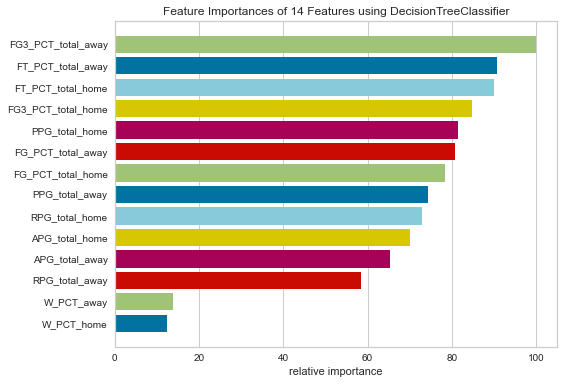

---------------------------------------------
i=1


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.70      0.65      1884
           1       0.65      0.56      0.60      1926

    accuracy                           0.63      3810
   macro avg       0.63      0.63      0.63      3810
weighted avg       0.63      0.63      0.63      3810



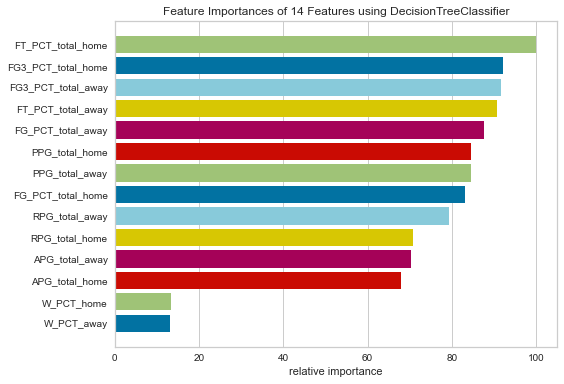

---------------------------------------------
i=2


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.63      0.70      0.67      1934
           1       0.65      0.58      0.61      1876

    accuracy                           0.64      3810
   macro avg       0.64      0.64      0.64      3810
weighted avg       0.64      0.64      0.64      3810



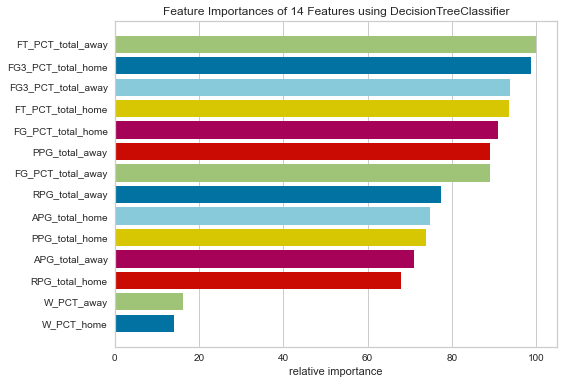

---------------------------------------------
i=3


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.61      0.71      0.66      1855
           1       0.67      0.56      0.61      1954

    accuracy                           0.64      3809
   macro avg       0.64      0.64      0.63      3809
weighted avg       0.64      0.64      0.63      3809



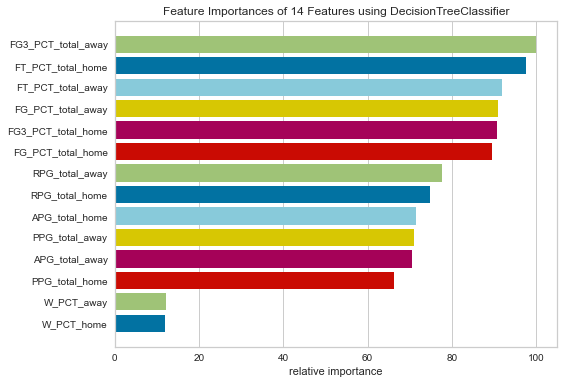

---------------------------------------------
i=4


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1923
           1       0.66      0.59      0.62      1886

    accuracy                           0.65      3809
   macro avg       0.65      0.65      0.65      3809
weighted avg       0.65      0.65      0.65      3809



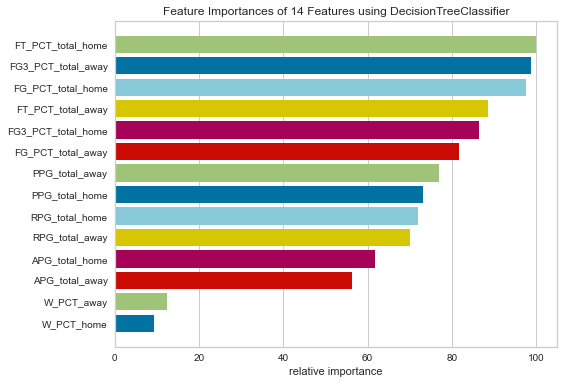

---------------------------------------------
Mean accuracy: 0.6348186089169937
Max accuracy: 0.641994750656168
Min accuracy: 0.6283464566929133
i=5


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.59      0.64      0.62      1777
           1       0.61      0.56      0.58      1777

    accuracy                           0.60      3554
   macro avg       0.60      0.60      0.60      3554
weighted avg       0.60      0.60      0.60      3554



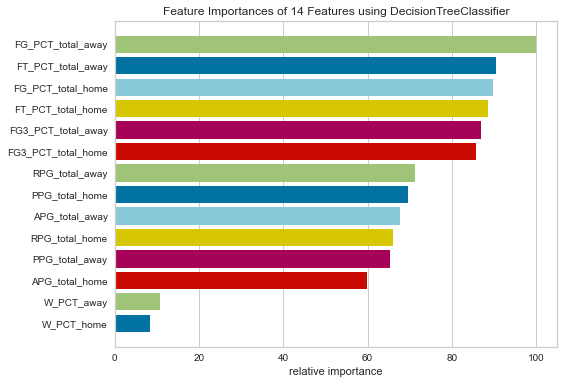

---------------------------------------------
i=6


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1795
           1       0.58      0.54      0.56      1759

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



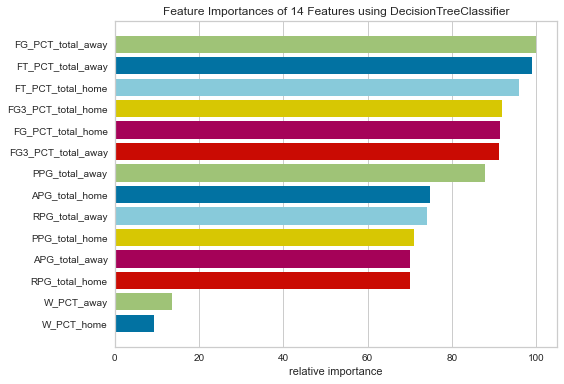

---------------------------------------------
i=7


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1785
           1       0.59      0.55      0.57      1769

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



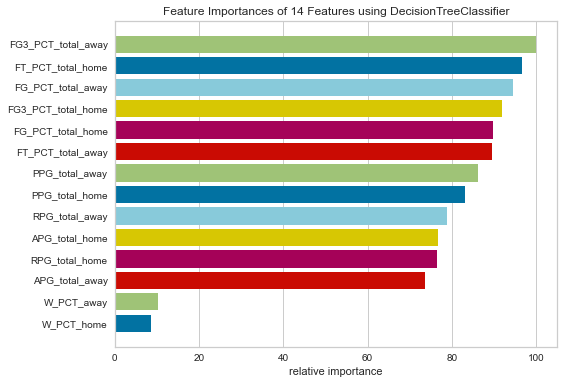

---------------------------------------------
i=8


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.63      0.60      1743
           1       0.61      0.56      0.58      1810

    accuracy                           0.59      3553
   macro avg       0.59      0.59      0.59      3553
weighted avg       0.59      0.59      0.59      3553



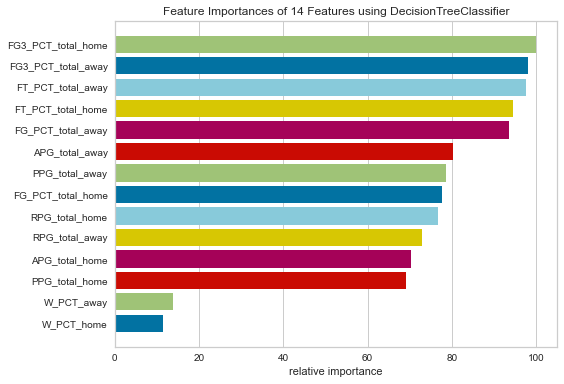

---------------------------------------------
i=9


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.62      0.60      1784
           1       0.58      0.53      0.55      1769

    accuracy                           0.58      3553
   macro avg       0.58      0.58      0.57      3553
weighted avg       0.58      0.58      0.57      3553



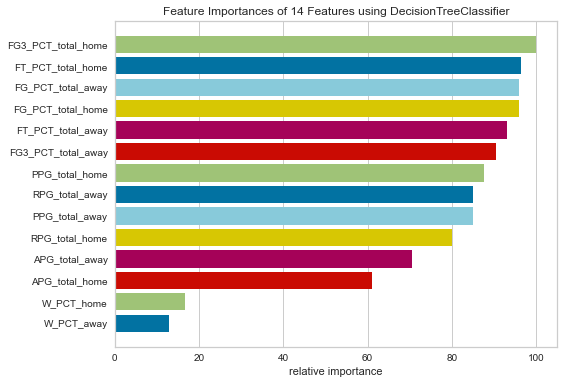

---------------------------------------------
Mean accuracy: 0.5883926508165364
Max accuracy: 0.6018570624648284
Min accuracy: 0.5776589758019134
i=10


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.54      0.54      1655
           1       0.52      0.50      0.51      1605

    accuracy                           0.52      3260
   macro avg       0.52      0.52      0.52      3260
weighted avg       0.52      0.52      0.52      3260



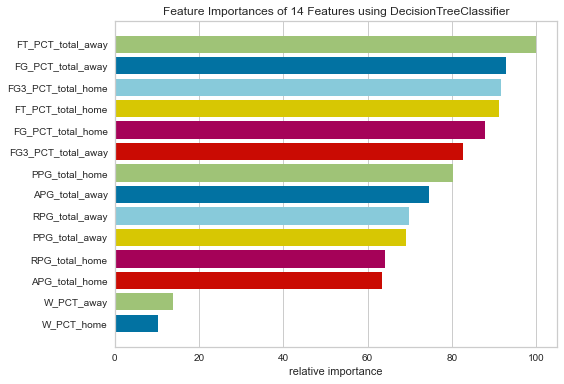

---------------------------------------------
i=11


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1581
           1       0.53      0.50      0.51      1678

    accuracy                           0.52      3259
   macro avg       0.52      0.52      0.52      3259
weighted avg       0.52      0.52      0.52      3259



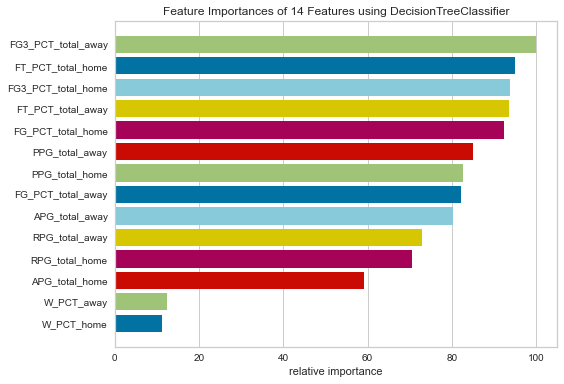

---------------------------------------------
i=12


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.53      0.53      1667
           1       0.51      0.51      0.51      1592

    accuracy                           0.52      3259
   macro avg       0.52      0.52      0.52      3259
weighted avg       0.52      0.52      0.52      3259



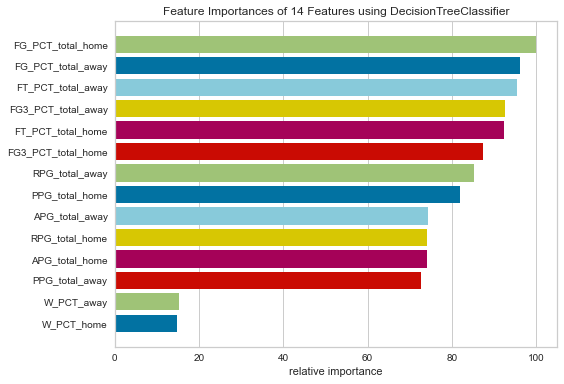

---------------------------------------------
i=13


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1618
           1       0.52      0.52      0.52      1641

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



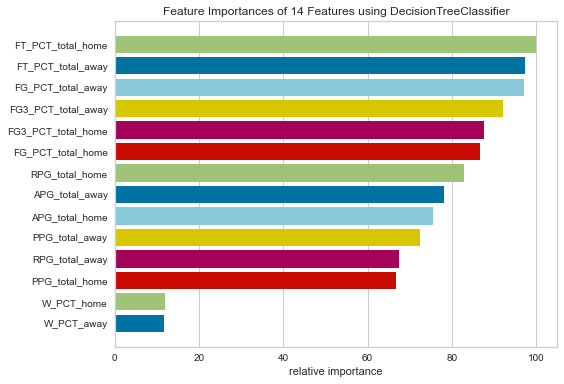

---------------------------------------------
i=14


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      1627
           1       0.51      0.51      0.51      1632

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



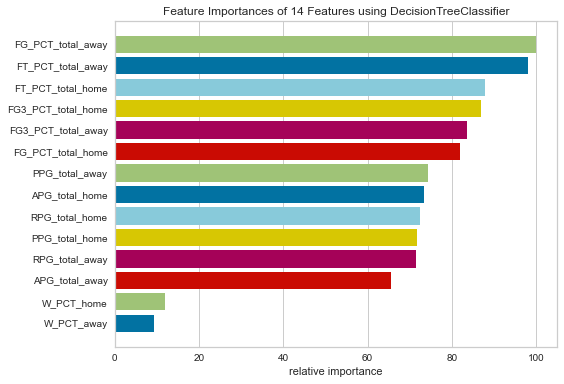

---------------------------------------------
Mean accuracy: 0.5176033287714813
Max accuracy: 0.5230061349693251
Min accuracy: 0.5145750230131942
i=15


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.50      0.50      1654
           1       0.49      0.50      0.50      1585

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.50      3239
weighted avg       0.50      0.50      0.50      3239



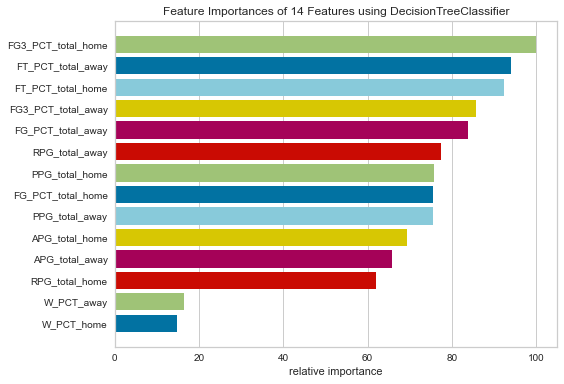

---------------------------------------------
i=16


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      1604
           1       0.50      0.50      0.50      1635

    accuracy                           0.49      3239
   macro avg       0.49      0.49      0.49      3239
weighted avg       0.49      0.49      0.49      3239



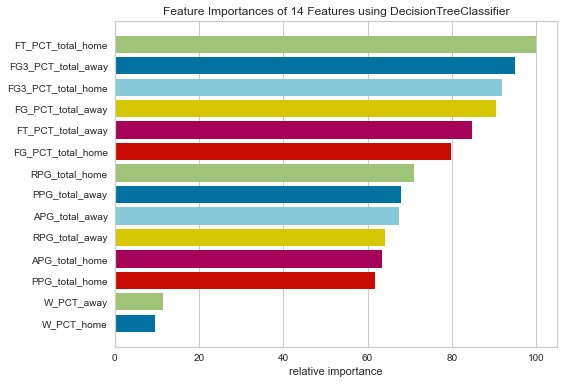

---------------------------------------------
i=17


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.52      0.52      1647
           1       0.51      0.52      0.52      1591

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



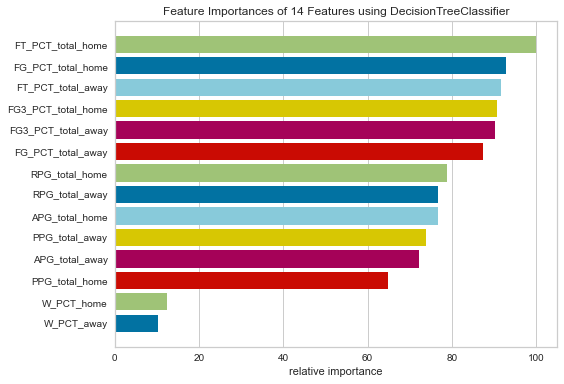

---------------------------------------------
i=18


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1625
           1       0.52      0.53      0.52      1613

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



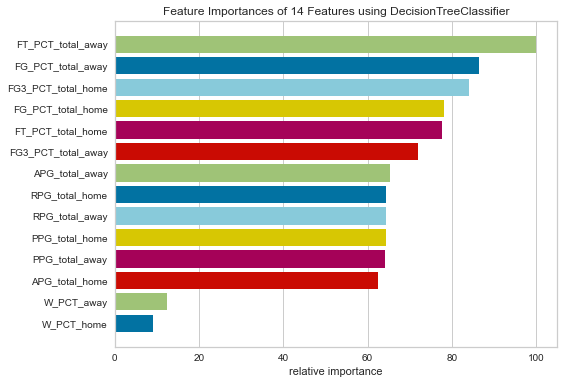

---------------------------------------------
i=19


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.49      0.52      0.51      1566
           1       0.53      0.50      0.51      1672

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.51      3238
weighted avg       0.51      0.51      0.51      3238



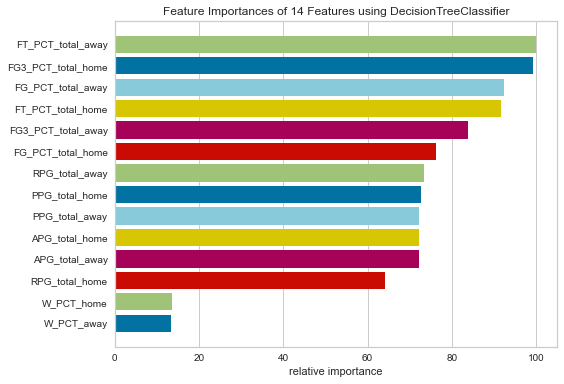

---------------------------------------------
Mean accuracy: 0.5084161654374068
Max accuracy: 0.5200741198270538
Min accuracy: 0.4930534115467737
i=20


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1810
           1       0.54      0.53      0.54      1706

    accuracy                           0.56      3516
   macro avg       0.55      0.55      0.55      3516
weighted avg       0.56      0.56      0.56      3516



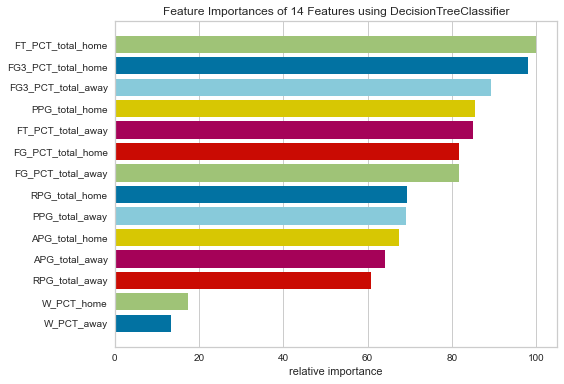

---------------------------------------------
i=21


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.61      0.59      1793
           1       0.56      0.52      0.54      1722

    accuracy                           0.56      3515
   macro avg       0.56      0.56      0.56      3515
weighted avg       0.56      0.56      0.56      3515



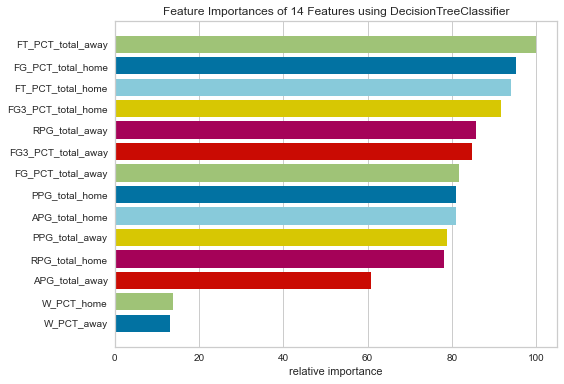

---------------------------------------------
i=22


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.59      0.58      1750
           1       0.57      0.55      0.56      1765

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.57      0.57      0.57      3515



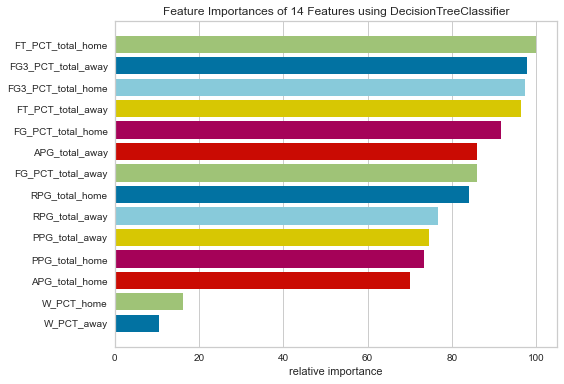

---------------------------------------------
i=23


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.56      0.62      0.59      1720
           1       0.60      0.53      0.56      1795

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



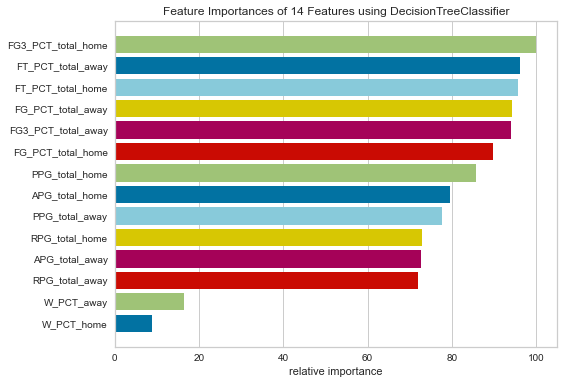

---------------------------------------------
i=24


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.61      0.58      1715
           1       0.59      0.54      0.56      1800

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.58      0.57      0.57      3515



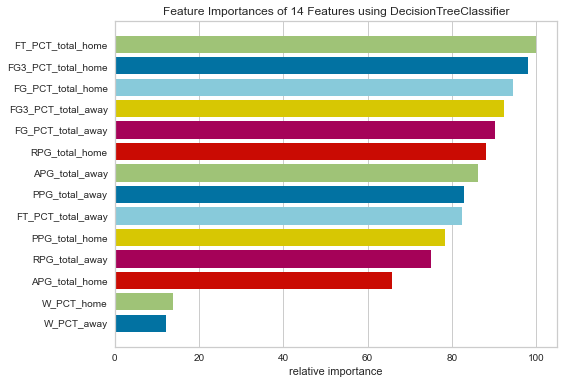

---------------------------------------------
Mean accuracy: 0.566247833517009
Max accuracy: 0.5789473684210527
Min accuracy: 0.5554607508532423
i=25


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.54
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1739
           1       0.54      0.52      0.53      1682

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



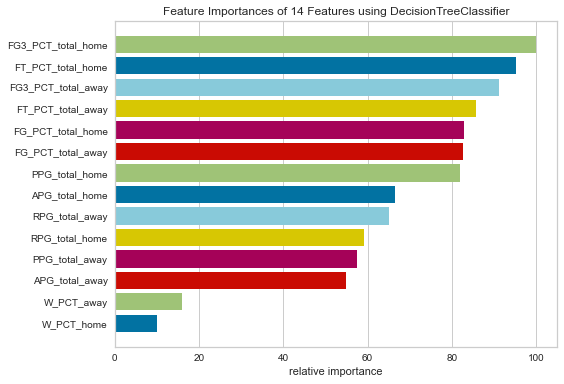

---------------------------------------------
i=26


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1725
           1       0.55      0.53      0.54      1696

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



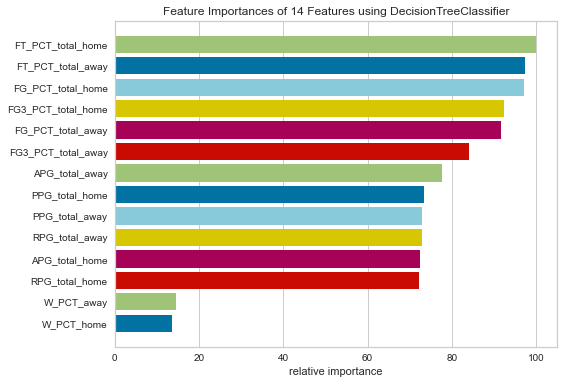

---------------------------------------------
i=27


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.55      0.54      1710
           1       0.54      0.52      0.53      1711

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



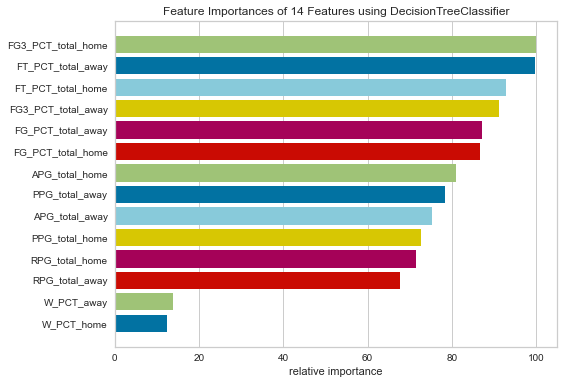

---------------------------------------------
i=28


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.55      0.62      0.58      1668
           1       0.58      0.51      0.55      1753

    accuracy                           0.56      3421
   macro avg       0.56      0.56      0.56      3421
weighted avg       0.57      0.56      0.56      3421



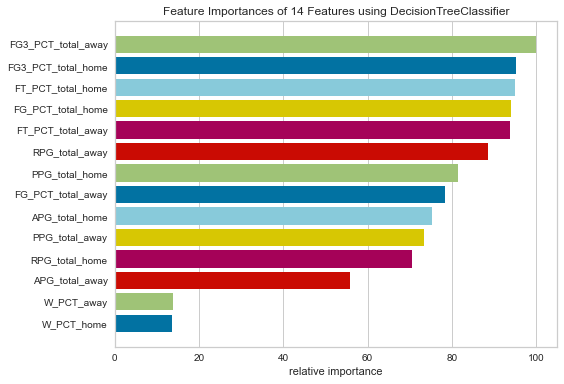

---------------------------------------------
i=29


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.58      0.56      1710
           1       0.55      0.51      0.53      1710

    accuracy                           0.54      3420
   macro avg       0.54      0.54      0.54      3420
weighted avg       0.54      0.54      0.54      3420



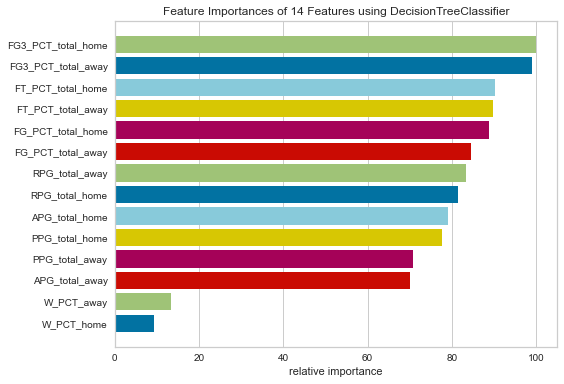

---------------------------------------------
Mean accuracy: 0.5485238234434375
Max accuracy: 0.5629932768196434
Min accuracy: 0.5384390529085062


In [28]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {'criterion':['gini','entropy']})

In [29]:
# plt.figure(figsize=(15,10))
# t = plot_tree(decision_tree_clf)

## Try prune max depth

i=0
WINNER:

Best decision tree accuracy ({'max_depth': 57, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.71      0.66      1928
           1       0.65      0.55      0.60      1882

    accuracy                           0.63      3810
   macro avg       0.64      0.63      0.63      3810
weighted avg       0.64      0.63      0.63      3810



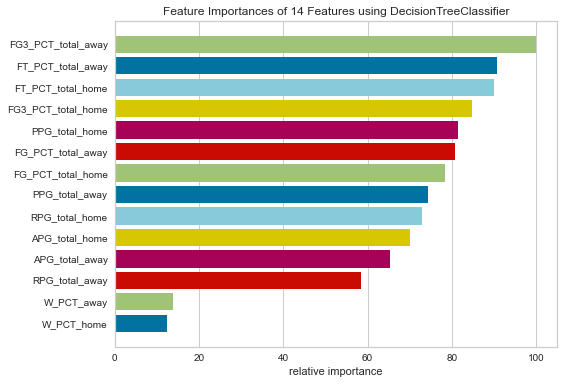

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_depth': 44, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      1884
           1       0.66      0.57      0.61      1926

    accuracy                           0.63      3810
   macro avg       0.63      0.63      0.63      3810
weighted avg       0.63      0.63      0.63      3810



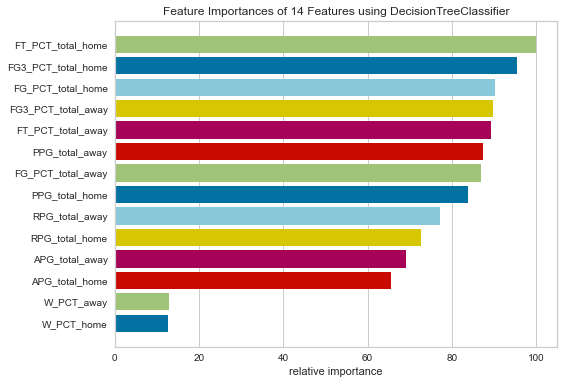

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_depth': 39, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.63      0.70      0.66      1934
           1       0.65      0.58      0.62      1876

    accuracy                           0.64      3810
   macro avg       0.64      0.64      0.64      3810
weighted avg       0.64      0.64      0.64      3810



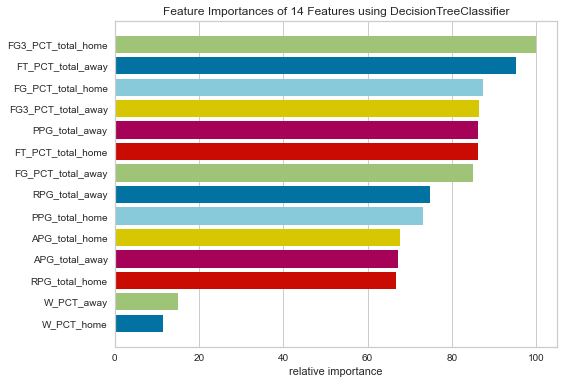

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_depth': 56, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.60      0.72      0.66      1855
           1       0.67      0.55      0.60      1954

    accuracy                           0.63      3809
   macro avg       0.64      0.63      0.63      3809
weighted avg       0.64      0.63      0.63      3809



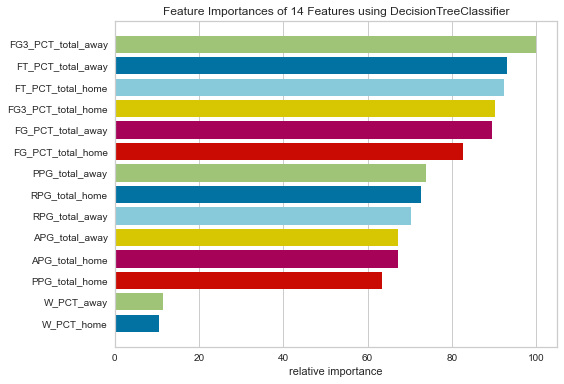

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_depth': 54, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.63      0.70      0.66      1923
           1       0.65      0.57      0.61      1886

    accuracy                           0.64      3809
   macro avg       0.64      0.64      0.64      3809
weighted avg       0.64      0.64      0.64      3809



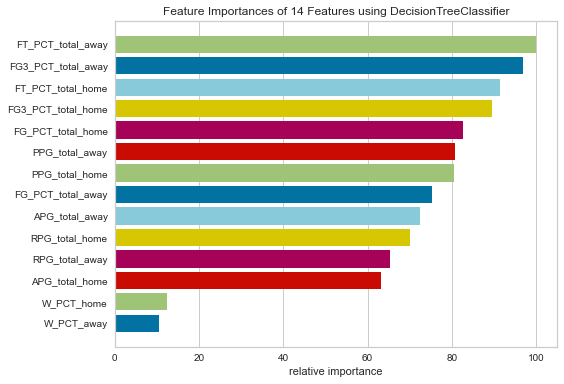

---------------------------------------------
Mean accuracy: 0.6345559005504989
Max accuracy: 0.6406824146981628
Min accuracy: 0.6319243896035704
i=5
FGP:

Best decision tree accuracy ({'max_depth': 57, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.59      0.63      0.61      1777
           1       0.61      0.57      0.59      1777

    accuracy                           0.60      3554
   macro avg       0.60      0.60      0.60      3554
weighted avg       0.60      0.60      0.60      3554



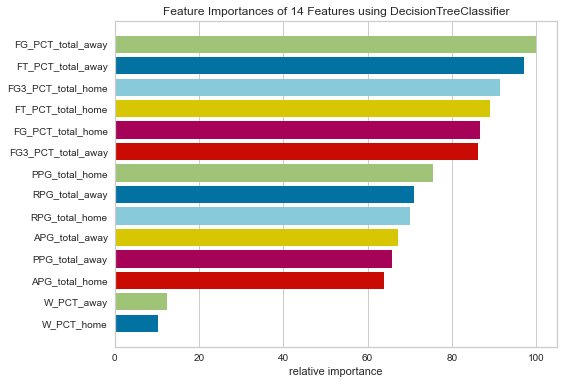

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_depth': 58, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1795
           1       0.58      0.54      0.56      1759

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



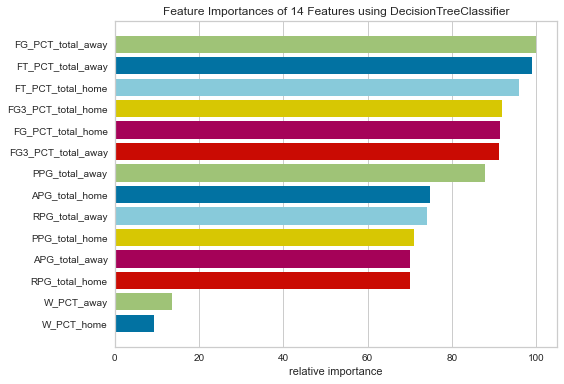

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_depth': 53, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1785
           1       0.59      0.55      0.57      1769

    accuracy                           0.59      3554
   macro avg       0.59      0.59      0.59      3554
weighted avg       0.59      0.59      0.59      3554



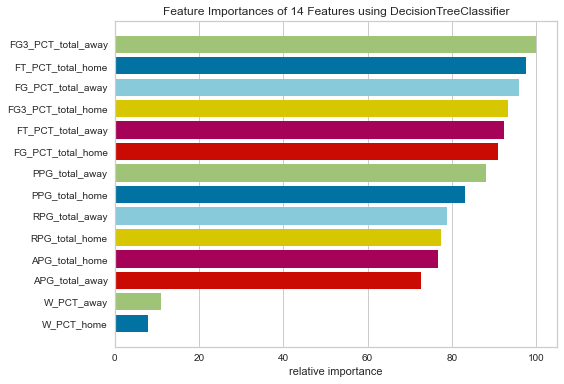

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_depth': 51, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.56      0.62      0.59      1743
           1       0.60      0.54      0.56      1810

    accuracy                           0.58      3553
   macro avg       0.58      0.58      0.58      3553
weighted avg       0.58      0.58      0.58      3553



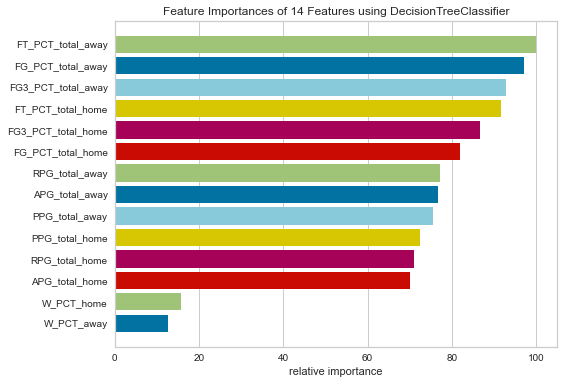

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_depth': 43, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.61      0.59      1784
           1       0.58      0.54      0.56      1769

    accuracy                           0.58      3553
   macro avg       0.58      0.58      0.57      3553
weighted avg       0.58      0.58      0.57      3553



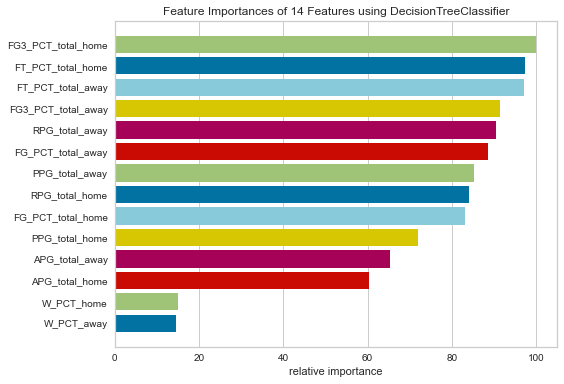

---------------------------------------------
Mean accuracy: 0.585648431556805
Max accuracy: 0.6010129431626337
Min accuracy: 0.5776589758019134
i=10
FG3:

Best decision tree accuracy ({'max_depth': 27, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.46      0.49      1655
           1       0.51      0.58      0.54      1605

    accuracy                           0.52      3260
   macro avg       0.52      0.52      0.52      3260
weighted avg       0.52      0.52      0.52      3260



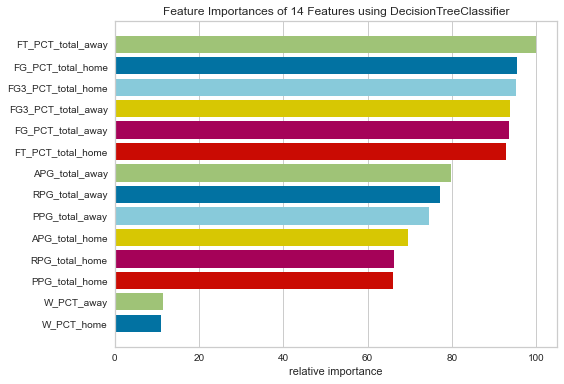

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_depth': 50, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1581
           1       0.53      0.50      0.51      1678

    accuracy                           0.52      3259
   macro avg       0.52      0.52      0.52      3259
weighted avg       0.52      0.52      0.52      3259



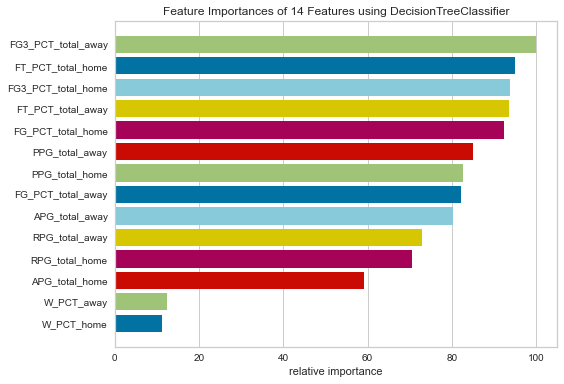

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_depth': 37, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.51      0.52      1667
           1       0.51      0.53      0.52      1592

    accuracy                           0.52      3259
   macro avg       0.52      0.52      0.52      3259
weighted avg       0.52      0.52      0.52      3259



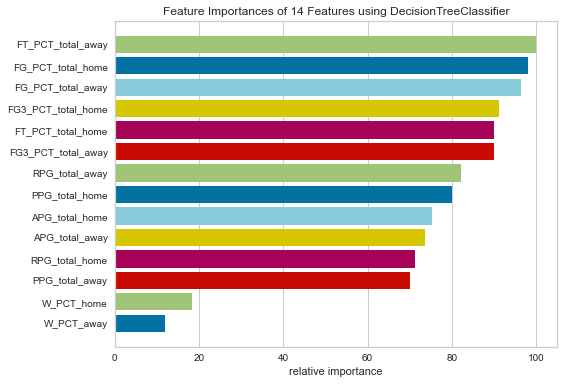

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_depth': 51, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1618
           1       0.52      0.52      0.52      1641

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



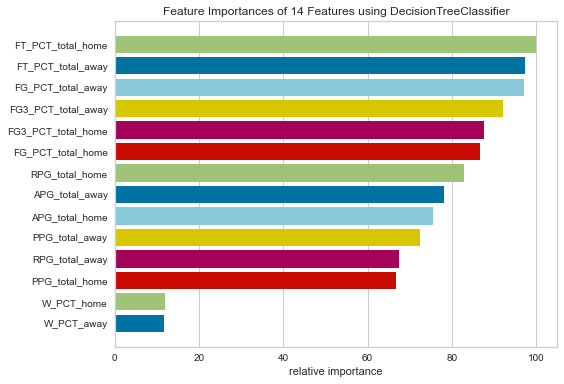

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_depth': 55, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.53      0.53      0.53      1627
           1       0.53      0.52      0.53      1632

    accuracy                           0.53      3259
   macro avg       0.53      0.53      0.53      3259
weighted avg       0.53      0.53      0.53      3259



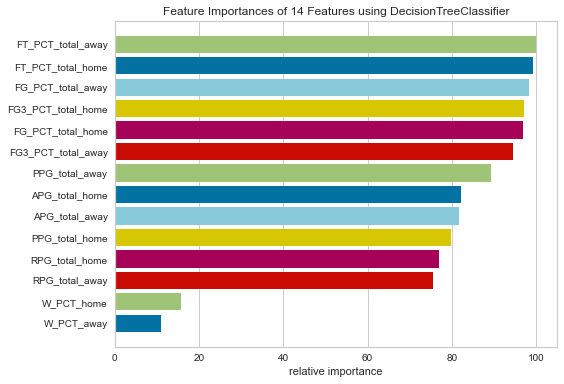

---------------------------------------------
Mean accuracy: 0.517220199090014
Max accuracy: 0.5213255599877263
Min accuracy: 0.5145750230131942
i=15
FT:

Best decision tree accuracy ({'max_depth': 50, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.50      0.50      1654
           1       0.49      0.50      0.50      1585

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.50      3239
weighted avg       0.50      0.50      0.50      3239



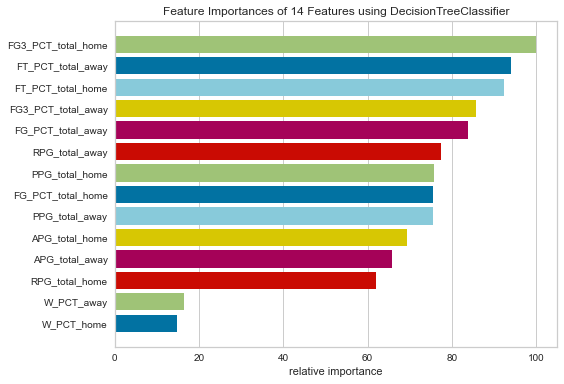

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_depth': 34, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.49      0.50      0.50      1604
           1       0.50      0.50      0.50      1635

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.50      3239
weighted avg       0.50      0.50      0.50      3239



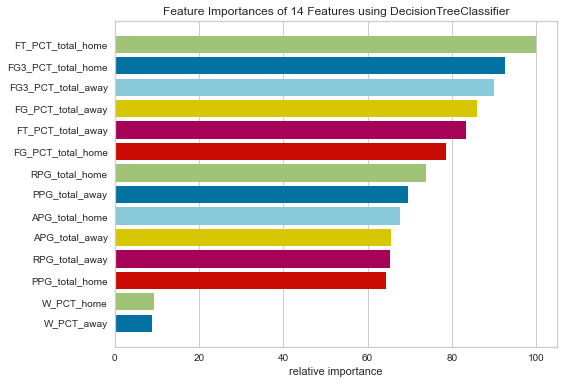

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_depth': 53, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.52      0.52      1647
           1       0.51      0.52      0.52      1591

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



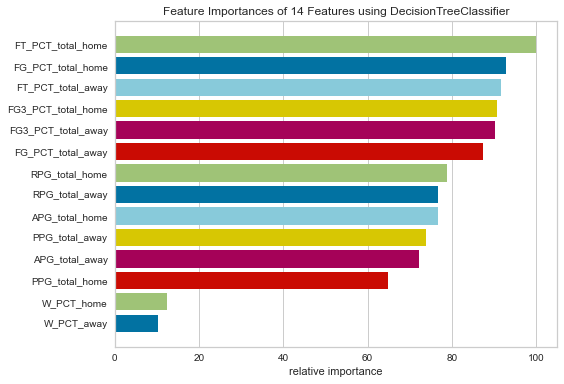

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_depth': 26, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.52      0.51      0.51      1625
           1       0.51      0.52      0.52      1613

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



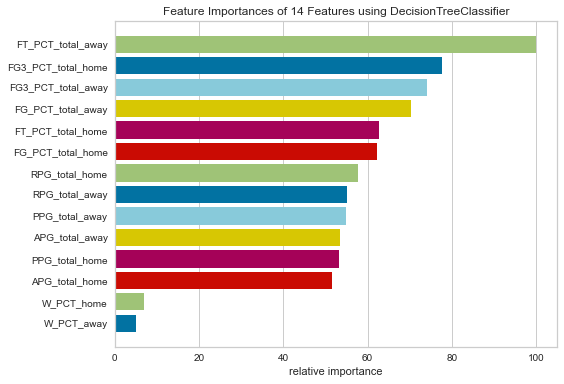

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_depth': 29, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.49      0.43      0.46      1566
           1       0.52      0.58      0.55      1672

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.50      3238
weighted avg       0.51      0.51      0.51      3238



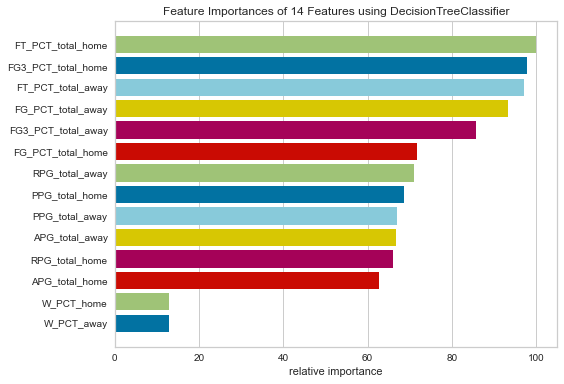

---------------------------------------------
Mean accuracy: 0.5089561934430613
Max accuracy: 0.5200741198270538
Min accuracy: 0.49861068230935474
i=20
AST:

Best decision tree accuracy ({'max_depth': 36, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1810
           1       0.55      0.54      0.54      1706

    accuracy                           0.56      3516
   macro avg       0.56      0.56      0.56      3516
weighted avg       0.56      0.56      0.56      3516



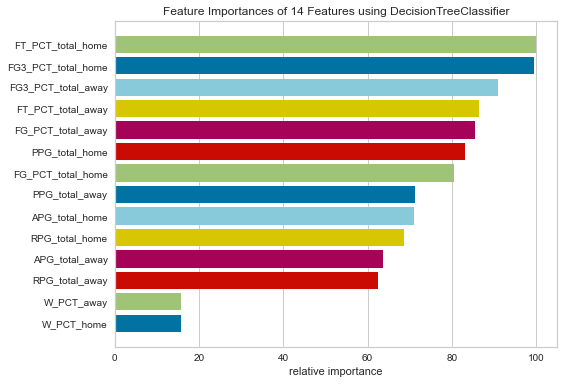

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_depth': 41, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1793
           1       0.57      0.55      0.56      1722

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



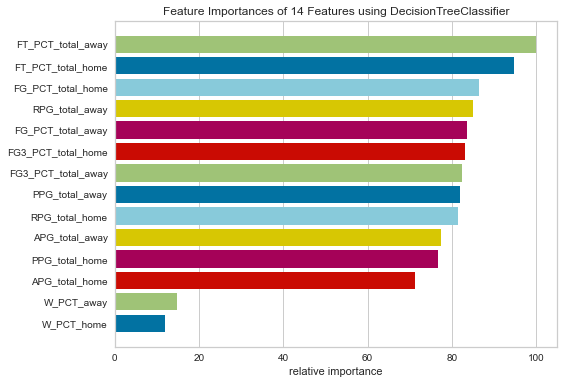

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_depth': 35, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1750
           1       0.57      0.55      0.56      1765

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.57      0.57      0.57      3515



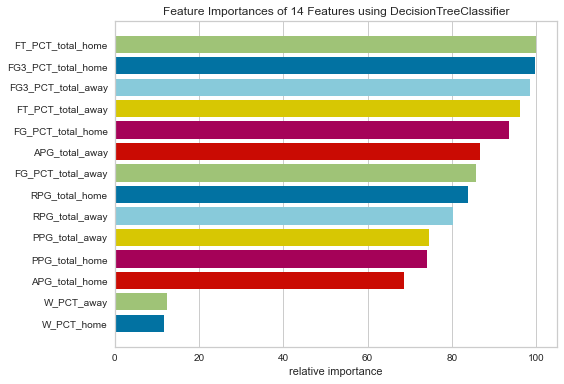

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_depth': 50, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.56      0.62      0.59      1720
           1       0.60      0.53      0.56      1795

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



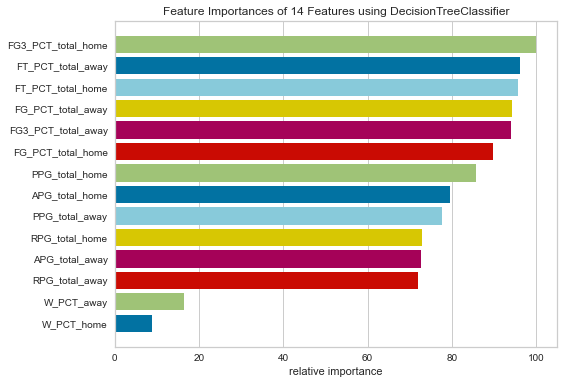

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_depth': 48, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.61      0.58      1715
           1       0.59      0.54      0.56      1800

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.58      0.57      0.57      3515



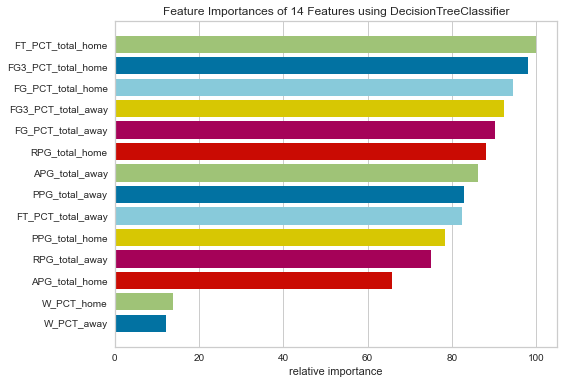

---------------------------------------------
Mean accuracy: 0.5700171700351331
Max accuracy: 0.5789473684210527
Min accuracy: 0.558589306029579
i=25
REB:

Best decision tree accuracy ({'max_depth': 59, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1739
           1       0.54      0.52      0.53      1682

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



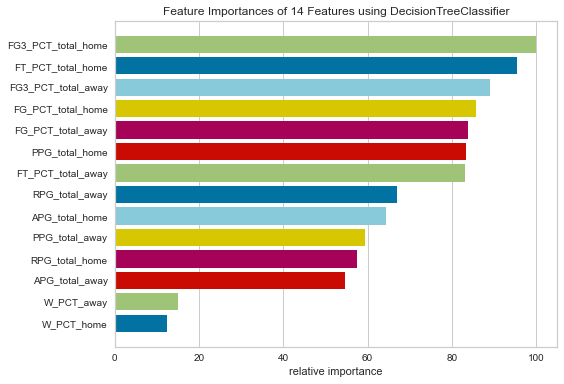

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_depth': 41, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1725
           1       0.55      0.53      0.54      1696

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



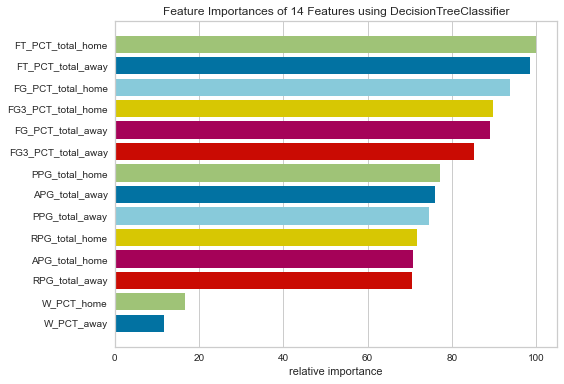

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_depth': 57, 'criterion': 'gini'}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.55      0.54      1710
           1       0.54      0.52      0.53      1711

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



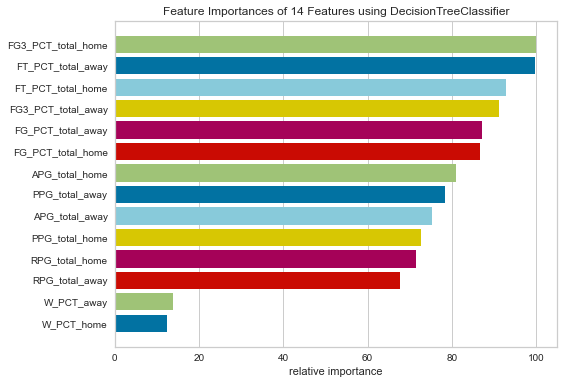

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_depth': 56, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.55      0.62      0.58      1668
           1       0.58      0.51      0.55      1753

    accuracy                           0.56      3421
   macro avg       0.56      0.56      0.56      3421
weighted avg       0.57      0.56      0.56      3421



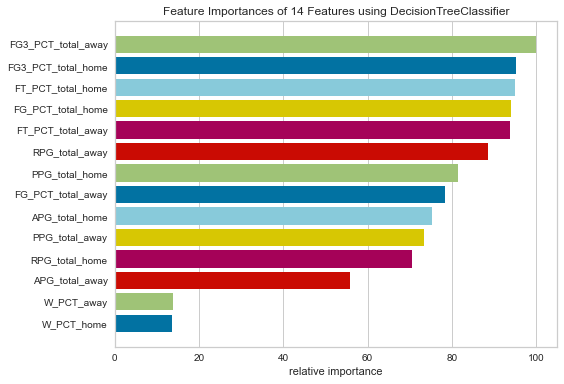

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_depth': 46, 'criterion': 'gini'}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.58      0.56      1710
           1       0.55      0.51      0.53      1710

    accuracy                           0.54      3420
   macro avg       0.54      0.54      0.54      3420
weighted avg       0.54      0.54      0.54      3420



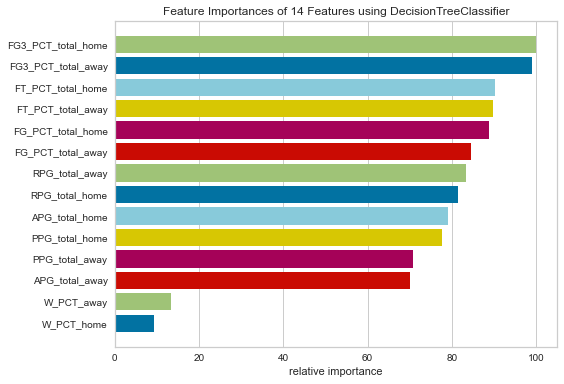

---------------------------------------------
Mean accuracy: 0.5507892429114294
Max accuracy: 0.5629932768196434
Min accuracy: 0.5384390529085062


In [30]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_depth': [*range(4,60)],
    'criterion': ['gini', 'entropy'],
})

## Try prune impurity decrease

i=0
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.71      0.66      1928
           1       0.65      0.55      0.60      1882

    accuracy                           0.63      3810
   macro avg       0.64      0.63      0.63      3810
weighted avg       0.64      0.63      0.63      3810



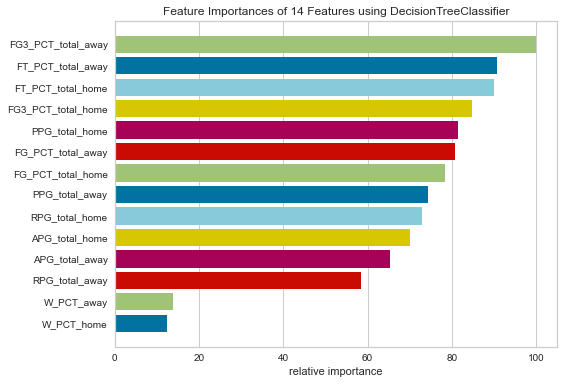

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.70      0.65      1884
           1       0.66      0.56      0.61      1926

    accuracy                           0.63      3810
   macro avg       0.63      0.63      0.63      3810
weighted avg       0.63      0.63      0.63      3810



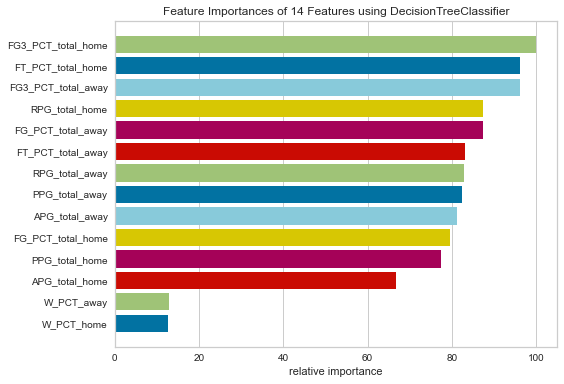

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.70      0.66      1934
           1       0.65      0.56      0.60      1876

    accuracy                           0.63      3810
   macro avg       0.64      0.63      0.63      3810
weighted avg       0.64      0.63      0.63      3810



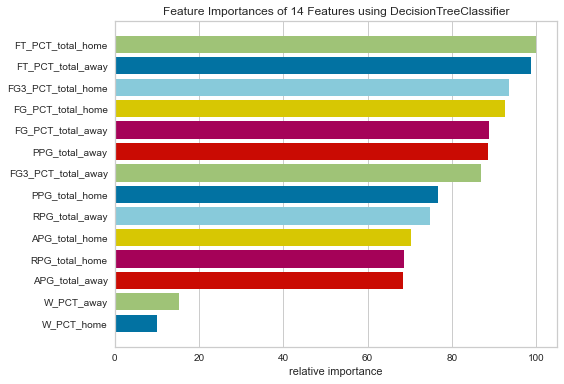

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.1, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1855
           1       0.00      0.00      0.00      1954

    accuracy                           0.49      3809
   macro avg       0.24      0.50      0.33      3809
weighted avg       0.24      0.49      0.32      3809



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

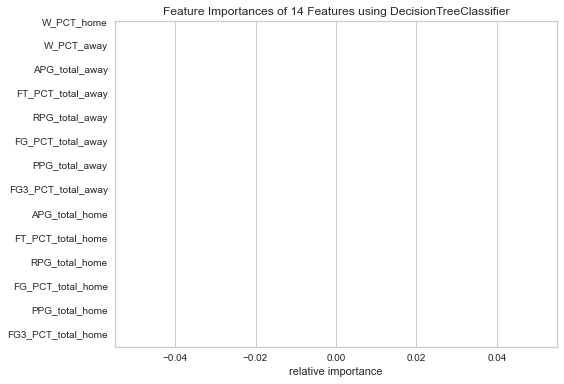

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.55, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1923
           1       0.50      1.00      0.66      1886

    accuracy                           0.50      3809
   macro avg       0.25      0.50      0.33      3809
weighted avg       0.25      0.50      0.33      3809



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

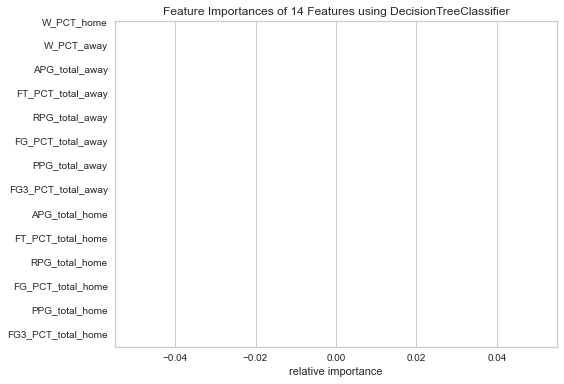

---------------------------------------------
Mean accuracy: 0.5965542653847188
Max accuracy: 0.6346456692913386
Min accuracy: 0.4870044631136781
i=5
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.1, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1777
           1       0.00      0.00      0.00      1777

    accuracy                           0.50      3554
   macro avg       0.25      0.50      0.33      3554
weighted avg       0.25      0.50      0.33      3554



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

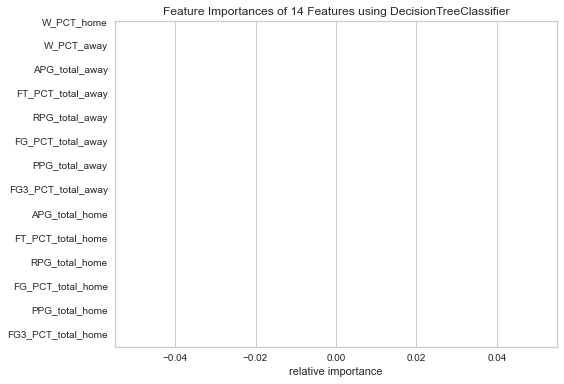

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1795
           1       0.58      0.54      0.56      1759

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



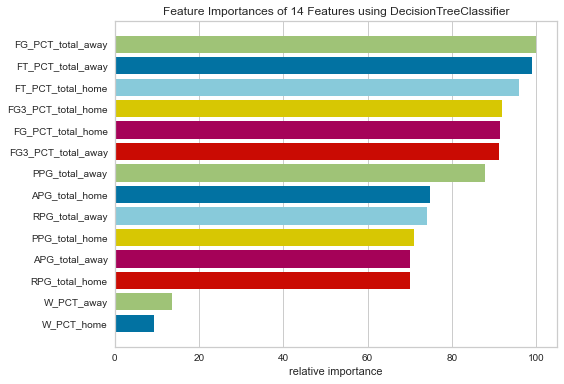

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1785
           1       0.59      0.54      0.56      1769

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



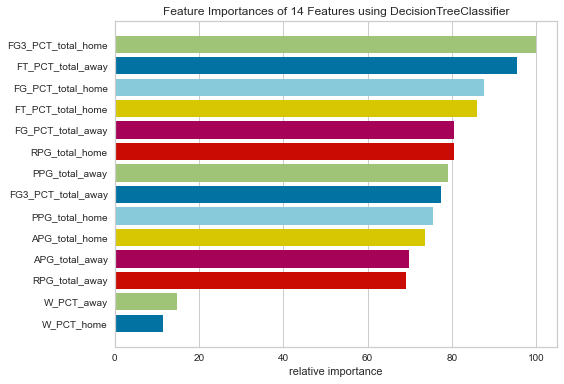

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.4, 'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1743
           1       0.00      0.00      0.00      1810

    accuracy                           0.49      3553
   macro avg       0.25      0.50      0.33      3553
weighted avg       0.24      0.49      0.32      3553



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

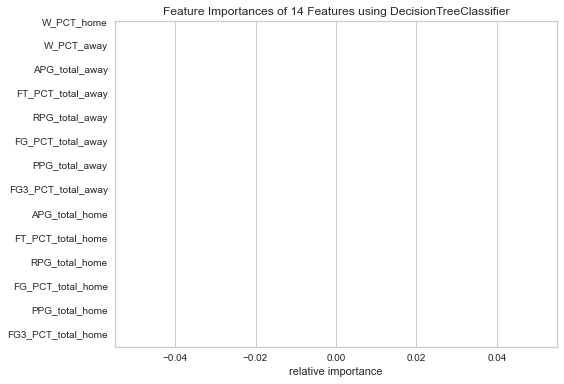

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.65, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1784
           1       0.50      1.00      0.66      1769

    accuracy                           0.50      3553
   macro avg       0.25      0.50      0.33      3553
weighted avg       0.25      0.50      0.33      3553



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

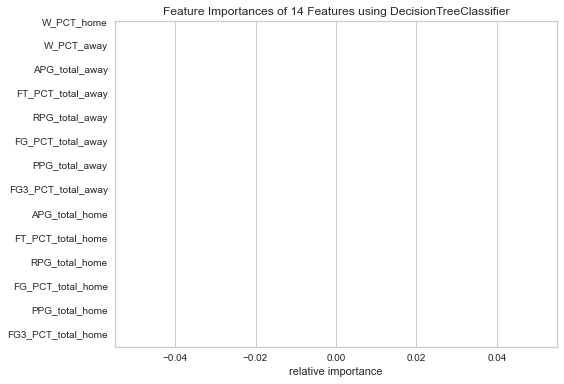

---------------------------------------------
Mean accuracy: 0.537457130792639
Max accuracy: 0.5815981992121553
Min accuracy: 0.49057134815648745
i=10
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.4, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1655
           1       0.49      1.00      0.66      1605

    accuracy                           0.49      3260
   macro avg       0.25      0.50      0.33      3260
weighted avg       0.24      0.49      0.32      3260



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

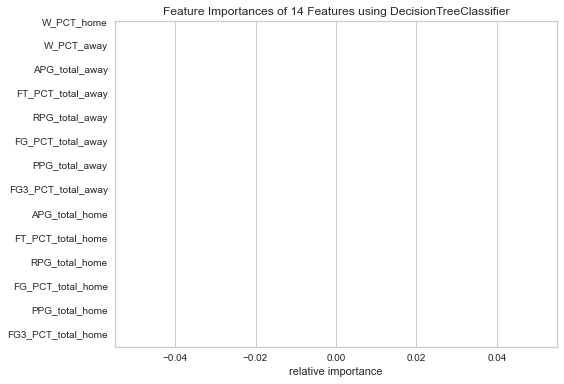

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.15, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.49      1.00      0.65      1581
           1       0.00      0.00      0.00      1678

    accuracy                           0.49      3259
   macro avg       0.24      0.50      0.33      3259
weighted avg       0.24      0.49      0.32      3259



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

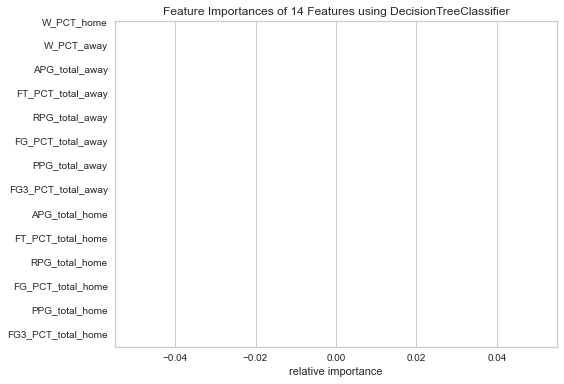

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.9, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1667
           1       0.49      1.00      0.66      1592

    accuracy                           0.49      3259
   macro avg       0.24      0.50      0.33      3259
weighted avg       0.24      0.49      0.32      3259



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

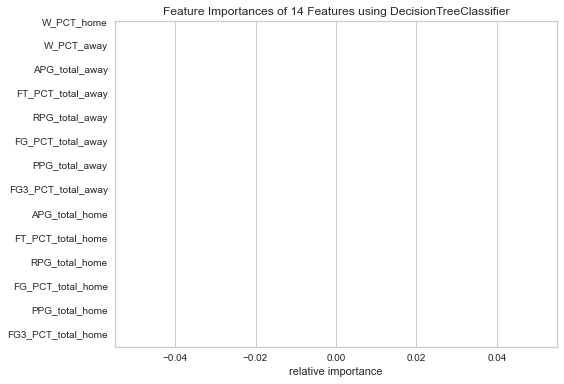

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1618
           1       0.52      0.52      0.52      1641

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



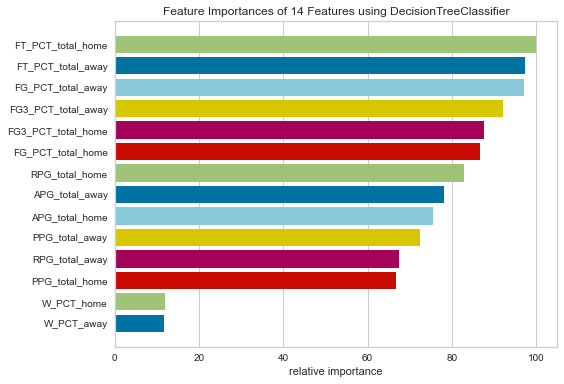

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      1627
           1       0.51      0.51      0.51      1632

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



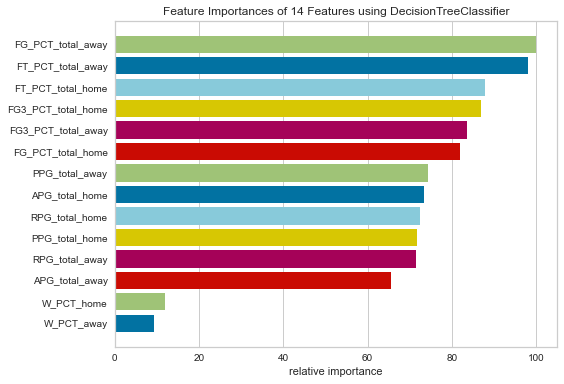

---------------------------------------------
Mean accuracy: 0.4951294621595318
Max accuracy: 0.5145750230131942
Min accuracy: 0.4851181343970543
i=15
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.53      0.50      0.51      1654
           1       0.50      0.53      0.51      1585

    accuracy                           0.51      3239
   macro avg       0.51      0.51      0.51      3239
weighted avg       0.51      0.51      0.51      3239



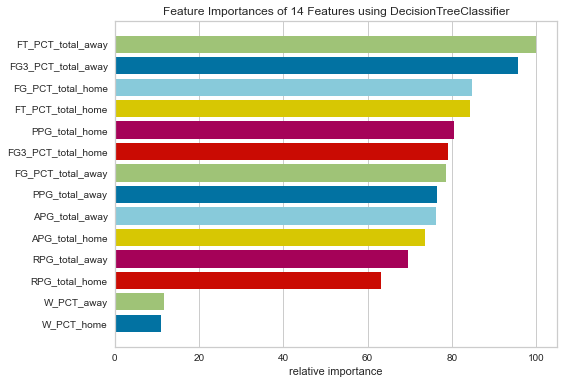

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.9, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      1604
           1       0.00      0.00      0.00      1635

    accuracy                           0.50      3239
   macro avg       0.25      0.50      0.33      3239
weighted avg       0.25      0.50      0.33      3239



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

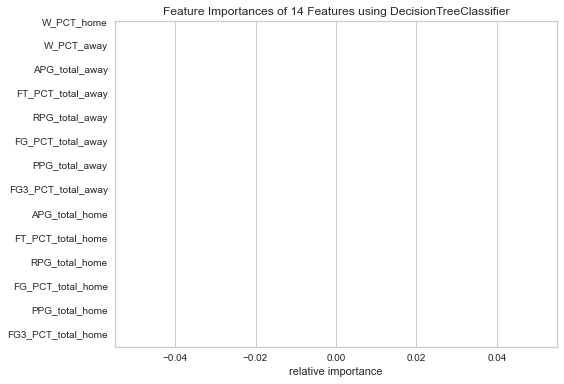

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.65, 'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1647
           1       0.49      1.00      0.66      1591

    accuracy                           0.49      3238
   macro avg       0.25      0.50      0.33      3238
weighted avg       0.24      0.49      0.32      3238



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

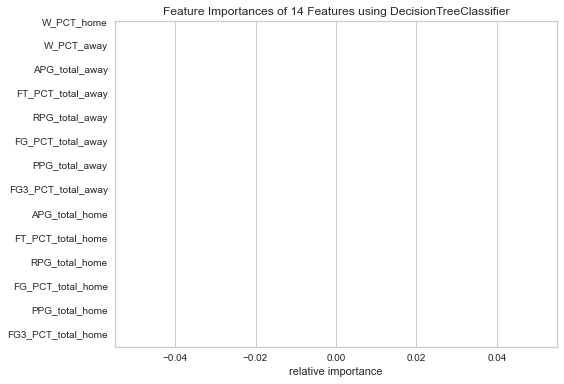

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.6, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1625
           1       0.50      1.00      0.67      1613

    accuracy                           0.50      3238
   macro avg       0.25      0.50      0.33      3238
weighted avg       0.25      0.50      0.33      3238



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

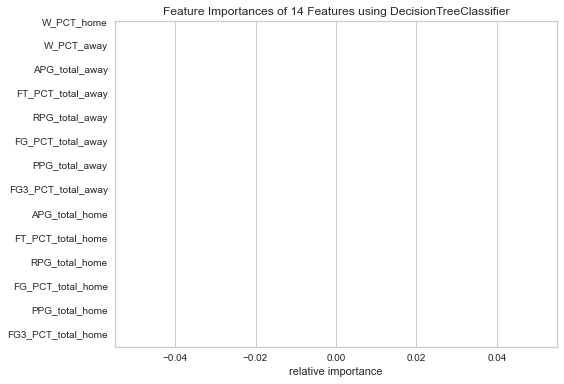

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.7, 'criterion': 'gini'}): 0.48
              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1566
           1       0.00      0.00      0.00      1672

    accuracy                           0.48      3238
   macro avg       0.24      0.50      0.33      3238
weighted avg       0.23      0.48      0.32      3238



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

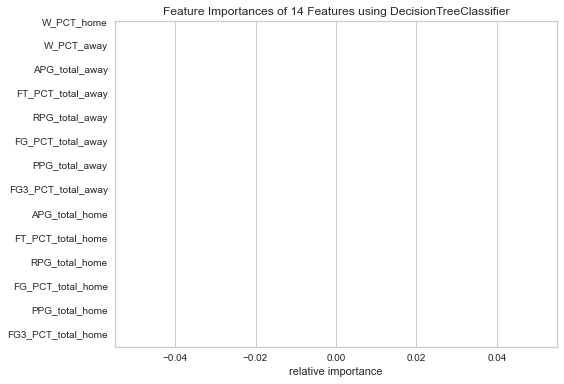

---------------------------------------------
Mean accuracy: 0.4996132679601087
Max accuracy: 0.5137388082741587
Min accuracy: 0.4913526868437307
i=20
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.25, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1810
           1       0.49      1.00      0.65      1706

    accuracy                           0.49      3516
   macro avg       0.24      0.50      0.33      3516
weighted avg       0.24      0.49      0.32      3516



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

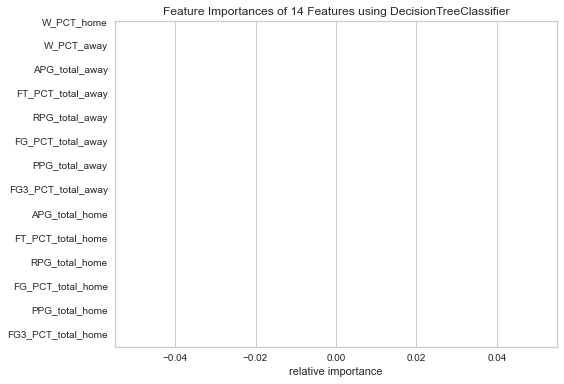

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.61      0.59      1793
           1       0.56      0.52      0.54      1722

    accuracy                           0.56      3515
   macro avg       0.56      0.56      0.56      3515
weighted avg       0.56      0.56      0.56      3515



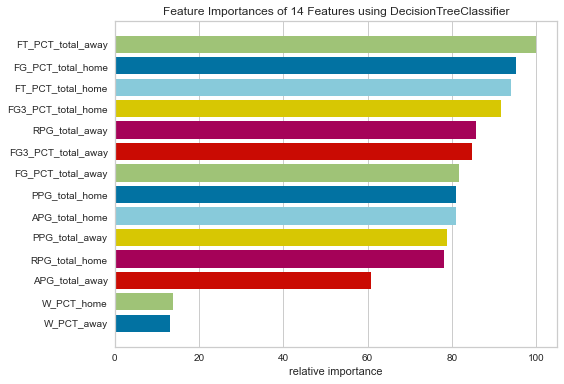

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.8, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      1750
           1       0.00      0.00      0.00      1765

    accuracy                           0.50      3515
   macro avg       0.25      0.50      0.33      3515
weighted avg       0.25      0.50      0.33      3515



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

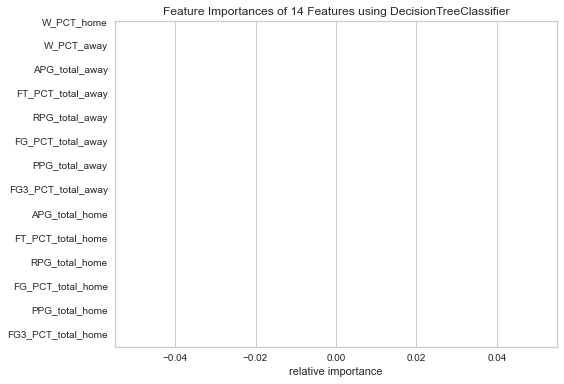

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.95, 'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1720
           1       0.00      0.00      0.00      1795

    accuracy                           0.49      3515
   macro avg       0.24      0.50      0.33      3515
weighted avg       0.24      0.49      0.32      3515



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

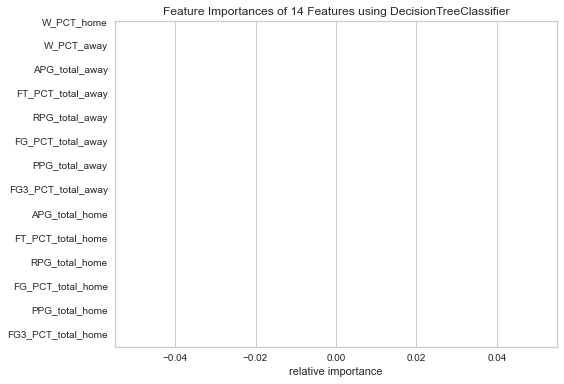

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.61      0.58      1715
           1       0.59      0.54      0.56      1800

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.58      0.57      0.57      3515



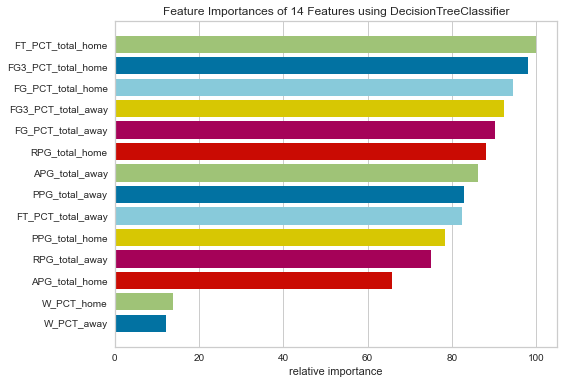

---------------------------------------------
Mean accuracy: 0.5086425881602817
Max accuracy: 0.5621621621621622
Min accuracy: 0.4852104664391354
i=25
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.55, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1739
           1       0.49      1.00      0.66      1682

    accuracy                           0.49      3421
   macro avg       0.25      0.50      0.33      3421
weighted avg       0.24      0.49      0.32      3421



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

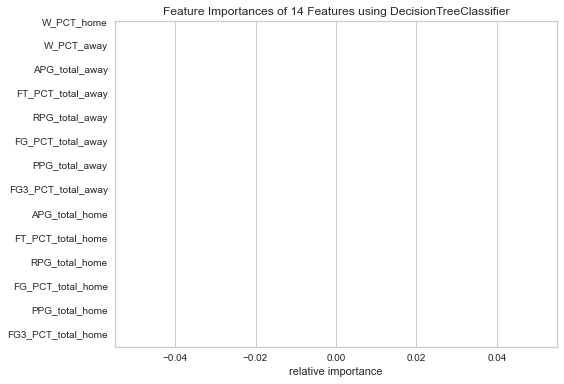

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.15, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1725
           1       0.50      1.00      0.66      1696

    accuracy                           0.50      3421
   macro avg       0.25      0.50      0.33      3421
weighted avg       0.25      0.50      0.33      3421



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

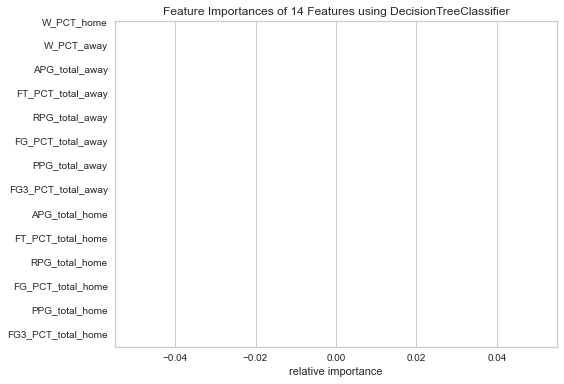

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.1, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1710
           1       0.00      0.00      0.00      1711

    accuracy                           0.50      3421
   macro avg       0.25      0.50      0.33      3421
weighted avg       0.25      0.50      0.33      3421



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

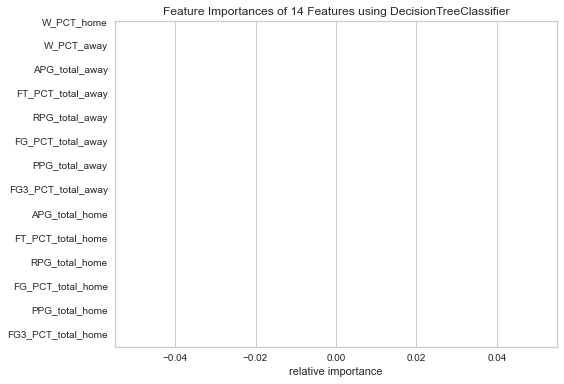

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.53      0.58      0.55      1668
           1       0.56      0.52      0.54      1753

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



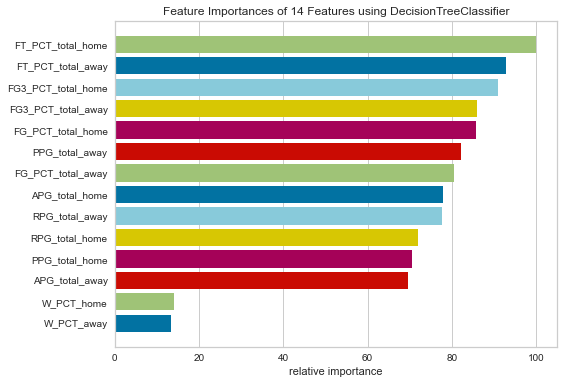

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1710
           1       0.56      0.51      0.54      1710

    accuracy                           0.55      3420
   macro avg       0.55      0.55      0.55      3420
weighted avg       0.55      0.55      0.55      3420



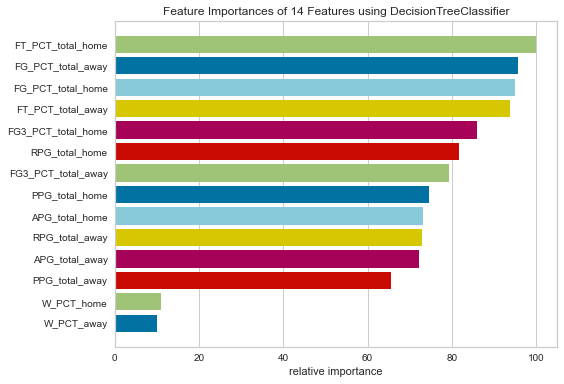

---------------------------------------------
Mean accuracy: 0.5084039754457761
Max accuracy: 0.5463314820228004
Min accuracy: 0.4916691026015785


In [31]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'min_impurity_decrease': [0.0,0.01],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'min_impurity_decrease': [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95],
    'criterion': ['gini', 'entropy'],
})
# print('Any non-zero min_impurity_decrease causes all classifications to be 1')

## Try prune max leaves

i=0
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 1944, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      1928
           1       0.63      0.56      0.59      1882

    accuracy                           0.62      3810
   macro avg       0.62      0.62      0.62      3810
weighted avg       0.62      0.62      0.62      3810



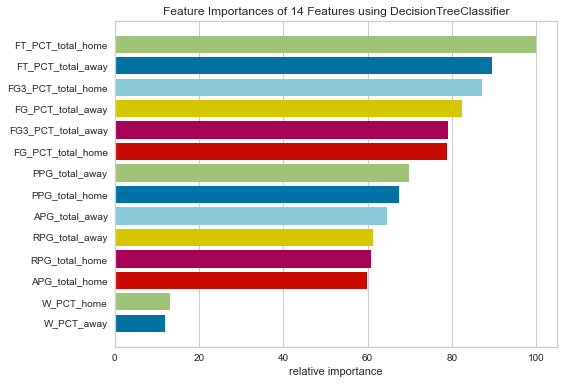

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 1950, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.59      0.69      0.64      1884
           1       0.64      0.54      0.59      1926

    accuracy                           0.61      3810
   macro avg       0.62      0.61      0.61      3810
weighted avg       0.62      0.61      0.61      3810



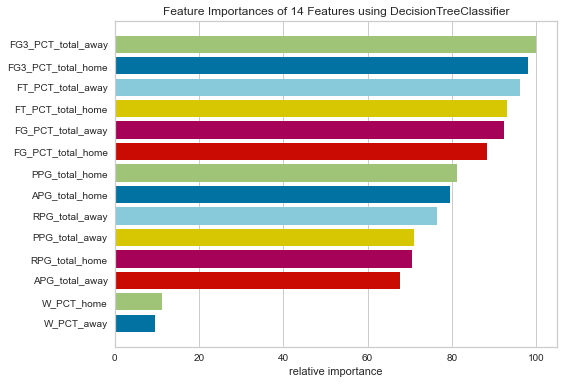

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 1688, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1934
           1       0.62      0.59      0.60      1876

    accuracy                           0.62      3810
   macro avg       0.62      0.62      0.61      3810
weighted avg       0.62      0.62      0.62      3810



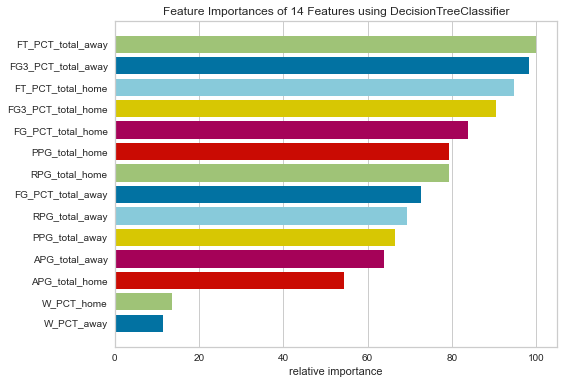

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 1540, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.58      0.64      0.61      1855
           1       0.62      0.57      0.59      1954

    accuracy                           0.60      3809
   macro avg       0.60      0.60      0.60      3809
weighted avg       0.60      0.60      0.60      3809



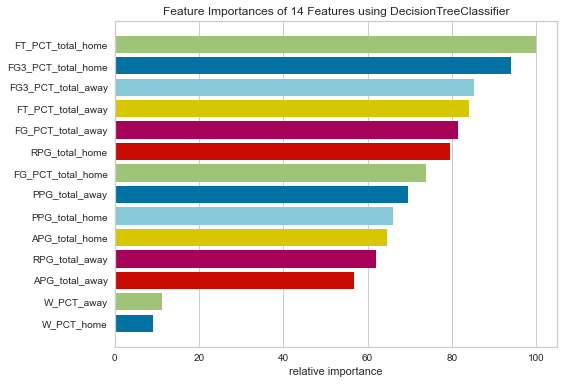

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 1986, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      1923
           1       0.61      0.57      0.59      1886

    accuracy                           0.61      3809
   macro avg       0.61      0.61      0.61      3809
weighted avg       0.61      0.61      0.61      3809



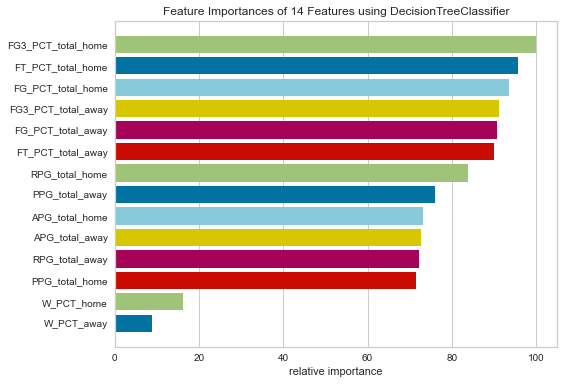

---------------------------------------------
Mean accuracy: 0.6119818099004362
Max accuracy: 0.6170603674540682
Min accuracy: 0.6027828826463639
i=5
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 1764, 'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.59      0.57      1777
           1       0.56      0.52      0.54      1777

    accuracy                           0.56      3554
   macro avg       0.56      0.56      0.56      3554
weighted avg       0.56      0.56      0.56      3554



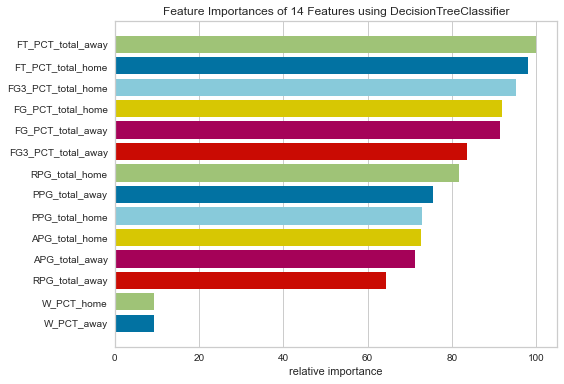

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 1690, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.59      0.57      1795
           1       0.56      0.53      0.54      1759

    accuracy                           0.56      3554
   macro avg       0.56      0.56      0.56      3554
weighted avg       0.56      0.56      0.56      3554



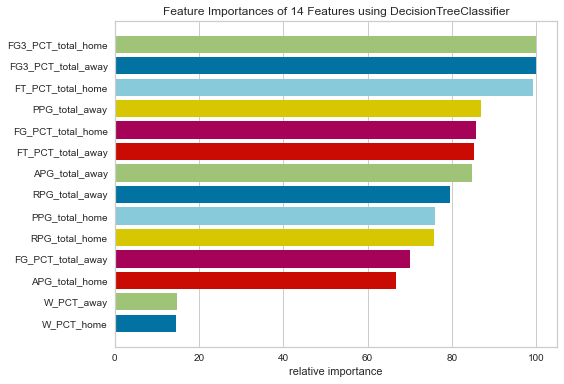

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 1694, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1785
           1       0.57      0.58      0.57      1769

    accuracy                           0.57      3554
   macro avg       0.57      0.57      0.57      3554
weighted avg       0.57      0.57      0.57      3554



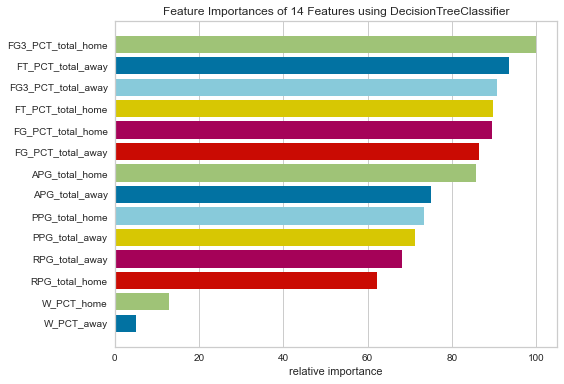

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 1956, 'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1743
           1       0.58      0.54      0.56      1810

    accuracy                           0.56      3553
   macro avg       0.57      0.57      0.56      3553
weighted avg       0.57      0.56      0.56      3553



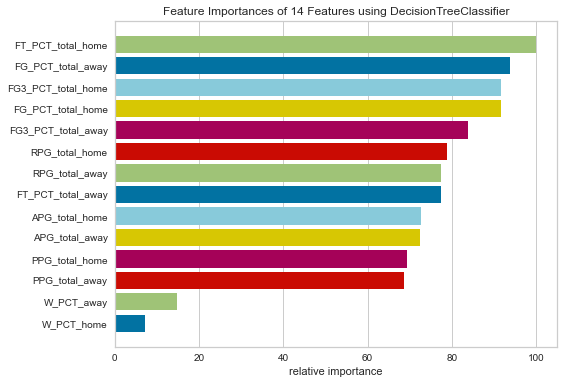

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 1920, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.62      0.60      1784
           1       0.58      0.53      0.56      1769

    accuracy                           0.58      3553
   macro avg       0.58      0.58      0.58      3553
weighted avg       0.58      0.58      0.58      3553



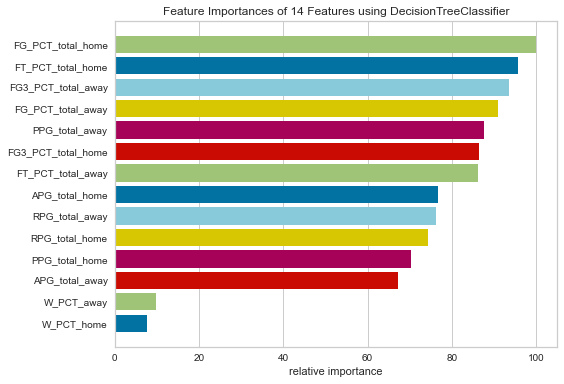

---------------------------------------------
Mean accuracy: 0.5639114092080357
Max accuracy: 0.5723128868880135
Min accuracy: 0.5593697242543613
i=10
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 1418, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.44      0.47      1655
           1       0.50      0.59      0.54      1605

    accuracy                           0.51      3260
   macro avg       0.51      0.51      0.51      3260
weighted avg       0.51      0.51      0.51      3260



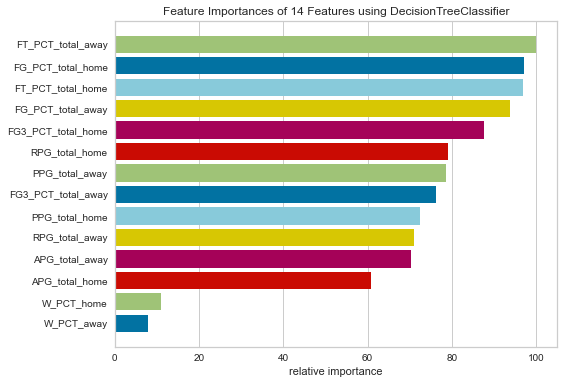

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 1856, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1581
           1       0.52      0.52      0.52      1678

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



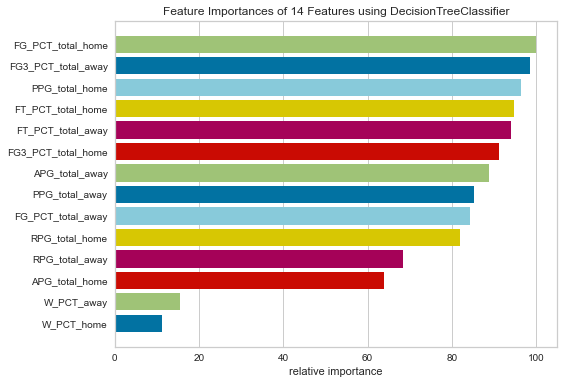

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 1772, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.44      0.48      1667
           1       0.50      0.58      0.54      1592

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



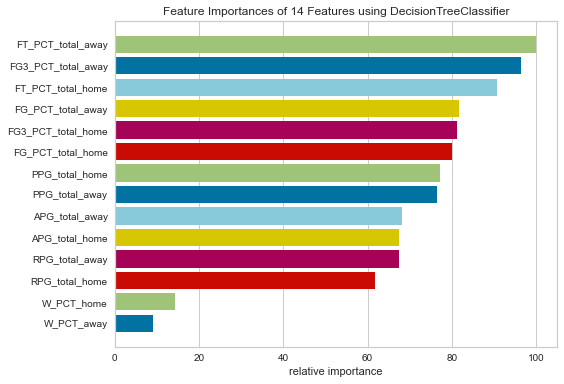

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 1808, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1618
           1       0.51      0.52      0.51      1641

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



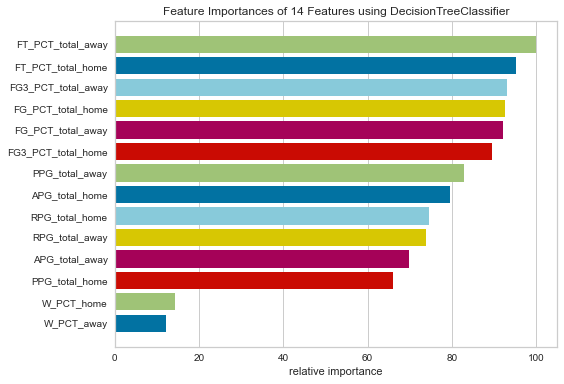

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 1712, 'criterion': 'entropy'}): 0.53
              precision    recall  f1-score   support

           0       0.53      0.52      0.52      1627
           1       0.53      0.54      0.53      1632

    accuracy                           0.53      3259
   macro avg       0.53      0.53      0.53      3259
weighted avg       0.53      0.53      0.53      3259



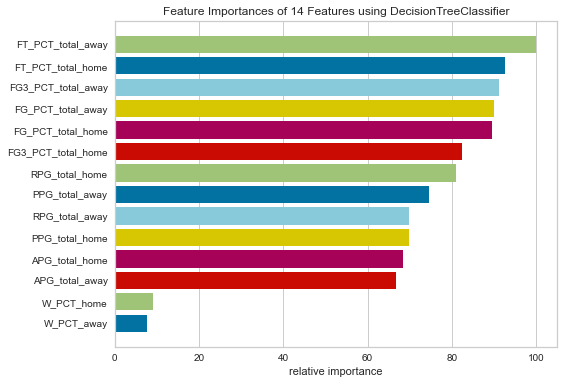

---------------------------------------------
Mean accuracy: 0.5097030733203192
Max accuracy: 0.5107361963190185
Min accuracy: 0.5081313286284136
i=15
FT:

Best decision tree accuracy ({'max_leaf_nodes': 1870, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.49      0.50      1654
           1       0.49      0.52      0.51      1585

    accuracy                           0.51      3239
   macro avg       0.51      0.51      0.51      3239
weighted avg       0.51      0.51      0.51      3239



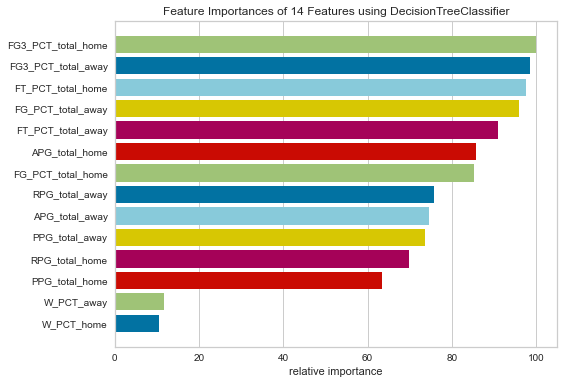

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_leaf_nodes': 1724, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1604
           1       0.52      0.51      0.51      1635

    accuracy                           0.51      3239
   macro avg       0.51      0.51      0.51      3239
weighted avg       0.51      0.51      0.51      3239



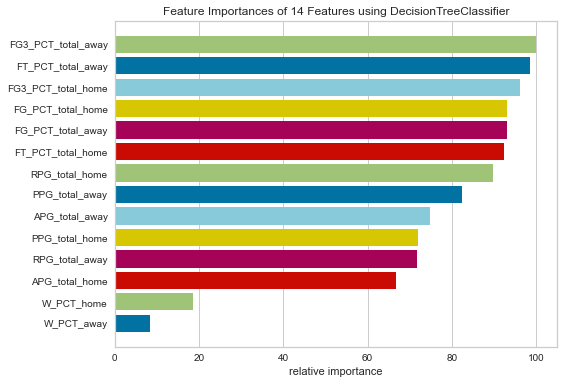

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_leaf_nodes': 1936, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1647
           1       0.49      0.48      0.49      1591

    accuracy                           0.50      3238
   macro avg       0.50      0.50      0.50      3238
weighted avg       0.50      0.50      0.50      3238



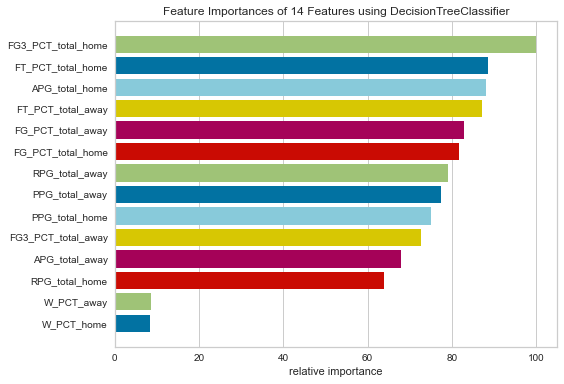

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_leaf_nodes': 1816, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.36      0.42      1625
           1       0.50      0.63      0.55      1613

    accuracy                           0.50      3238
   macro avg       0.50      0.50      0.49      3238
weighted avg       0.50      0.50      0.49      3238



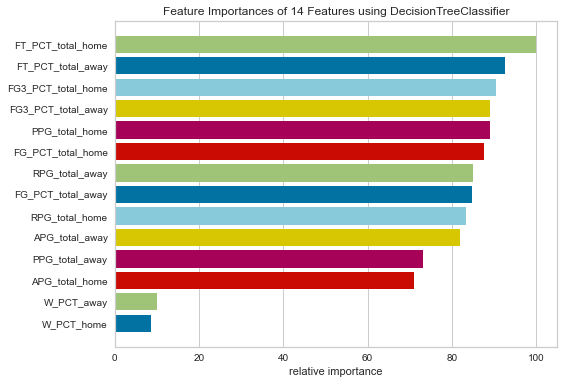

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_leaf_nodes': 1936, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1566
           1       0.53      0.51      0.52      1672

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



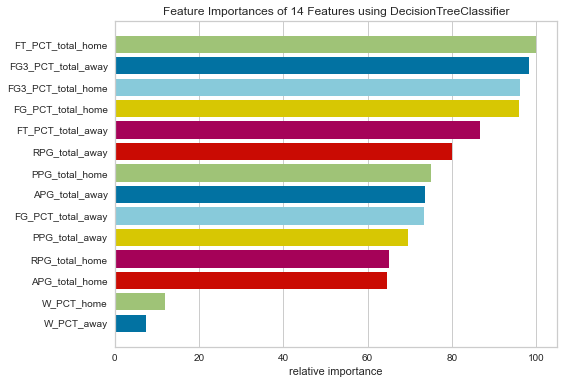

---------------------------------------------
Mean accuracy: 0.5030097831001531
Max accuracy: 0.5121951219512195
Min accuracy: 0.49598517603458925
i=20
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1312, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.59      0.58      1810
           1       0.54      0.51      0.53      1706

    accuracy                           0.55      3516
   macro avg       0.55      0.55      0.55      3516
weighted avg       0.55      0.55      0.55      3516



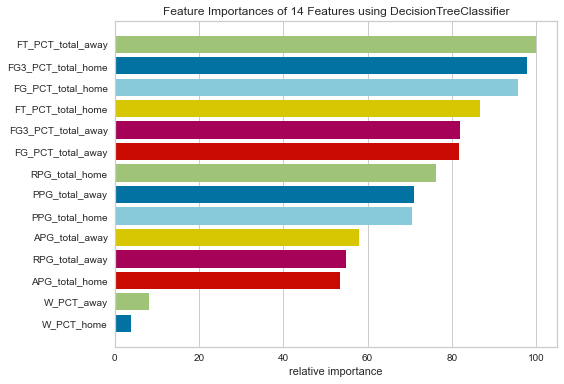

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1642, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      1793
           1       0.55      0.49      0.52      1722

    accuracy                           0.55      3515
   macro avg       0.55      0.55      0.55      3515
weighted avg       0.55      0.55      0.55      3515



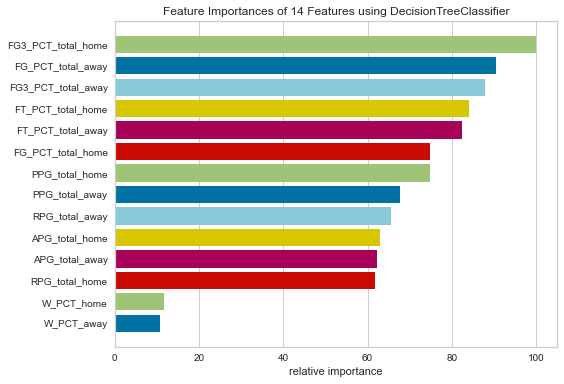

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1880, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1750
           1       0.55      0.53      0.54      1765

    accuracy                           0.55      3515
   macro avg       0.55      0.55      0.55      3515
weighted avg       0.55      0.55      0.55      3515



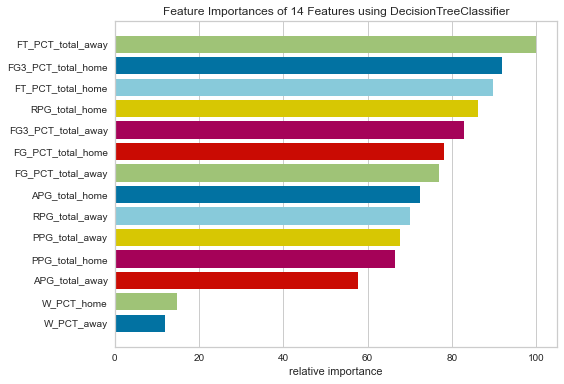

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1938, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.54      0.59      0.56      1720
           1       0.57      0.50      0.53      1795

    accuracy                           0.55      3515
   macro avg       0.55      0.55      0.55      3515
weighted avg       0.55      0.55      0.55      3515



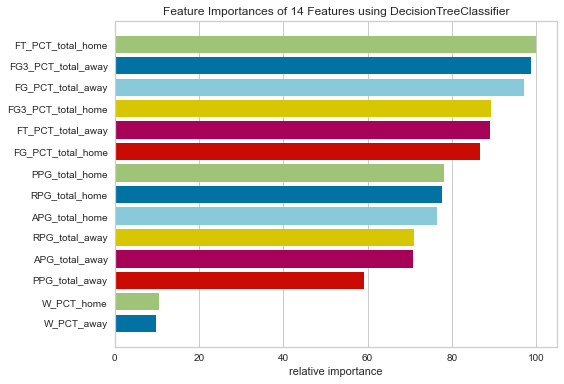

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1752, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.53      0.54      0.54      1715
           1       0.56      0.55      0.55      1800

    accuracy                           0.55      3515
   macro avg       0.55      0.55      0.55      3515
weighted avg       0.55      0.55      0.55      3515



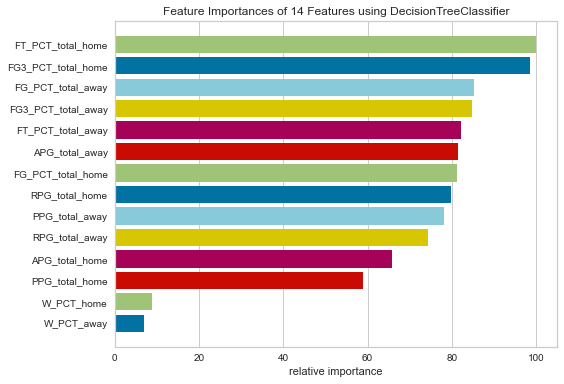

---------------------------------------------
Mean accuracy: 0.5503162134651267
Max accuracy: 0.5540386803185438
Min accuracy: 0.5470839260312944
i=25
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1830, 'criterion': 'gini'}): 0.54
              precision    recall  f1-score   support

           0       0.55      0.56      0.56      1739
           1       0.54      0.52      0.53      1682

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



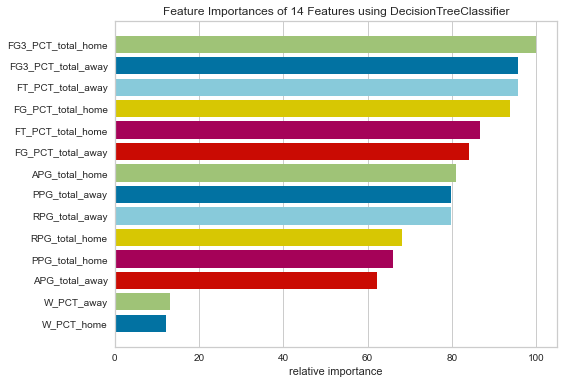

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1636, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.54      0.55      0.54      1725
           1       0.53      0.52      0.52      1696

    accuracy                           0.53      3421
   macro avg       0.53      0.53      0.53      3421
weighted avg       0.53      0.53      0.53      3421



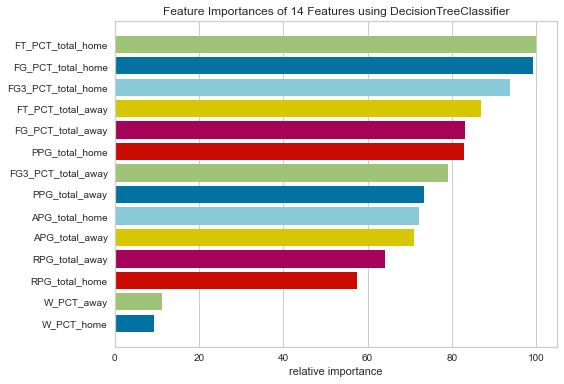

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1708, 'criterion': 'gini'}): 0.54
              precision    recall  f1-score   support

           0       0.53      0.56      0.55      1710
           1       0.54      0.51      0.52      1711

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



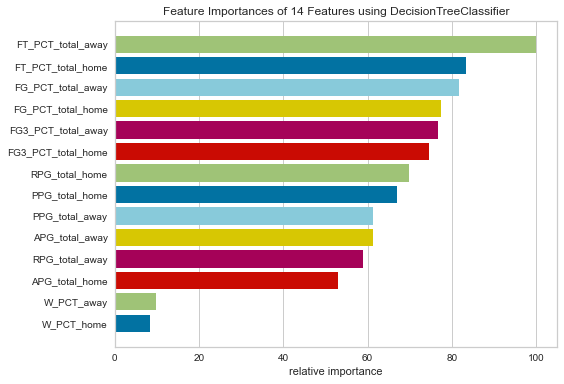

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1962, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.53      0.59      0.56      1668
           1       0.56      0.51      0.54      1753

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



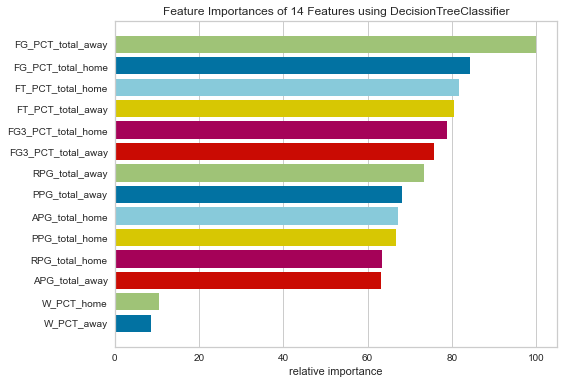

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_leaf_nodes': 990, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.53      0.51      0.52      1710
           1       0.53      0.55      0.54      1710

    accuracy                           0.53      3420
   macro avg       0.53      0.53      0.53      3420
weighted avg       0.53      0.53      0.53      3420



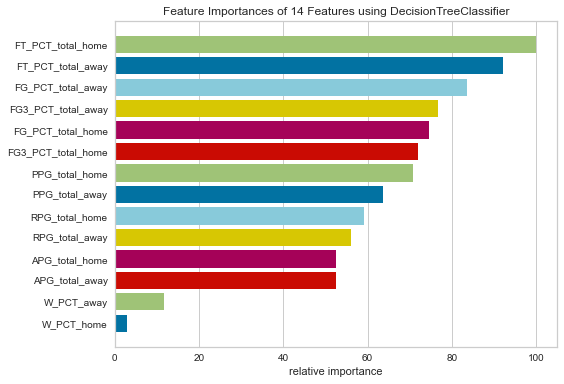

---------------------------------------------
Mean accuracy: 0.539681379713534
Max accuracy: 0.5463314820228004
Min accuracy: 0.5340543700672318


In [27]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'max_leaf_nodes': [*range(4,60)],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_leaf_nodes': [*range(4,2000,2)],
    'criterion': ['gini', 'entropy'],
})

## Try prune max features

i=0
WINNER:

Best decision tree accuracy ({'max_features': 4, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.69      0.66      1928
           1       0.64      0.57      0.61      1882

    accuracy                           0.63      3810
   macro avg       0.63      0.63      0.63      3810
weighted avg       0.63      0.63      0.63      3810



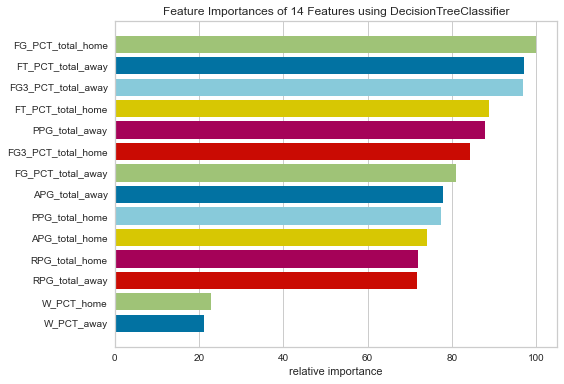

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.70      0.65      1884
           1       0.66      0.55      0.60      1926

    accuracy                           0.63      3810
   macro avg       0.63      0.63      0.63      3810
weighted avg       0.63      0.63      0.63      3810



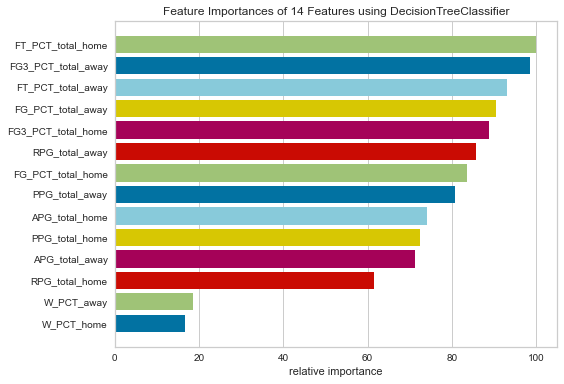

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_features': 1, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.63      0.70      0.67      1934
           1       0.65      0.57      0.61      1876

    accuracy                           0.64      3810
   macro avg       0.64      0.64      0.64      3810
weighted avg       0.64      0.64      0.64      3810



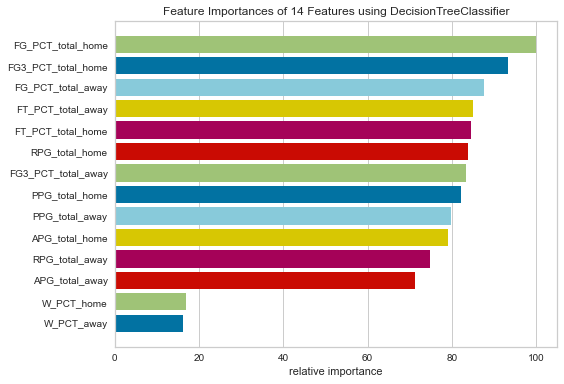

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_features': 1, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.62      0.70      0.65      1855
           1       0.67      0.59      0.63      1954

    accuracy                           0.64      3809
   macro avg       0.64      0.64      0.64      3809
weighted avg       0.64      0.64      0.64      3809



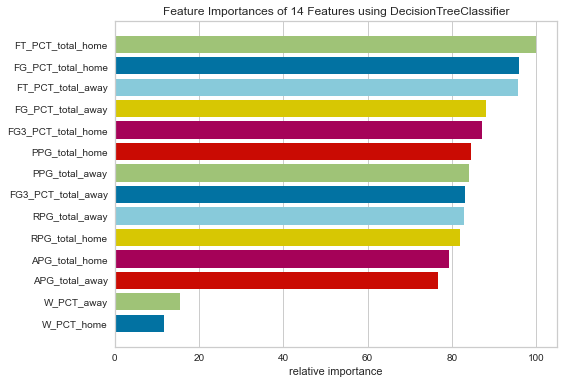

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_features': 'sqrt', 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.63      0.71      0.67      1923
           1       0.66      0.57      0.61      1886

    accuracy                           0.64      3809
   macro avg       0.64      0.64      0.64      3809
weighted avg       0.64      0.64      0.64      3809



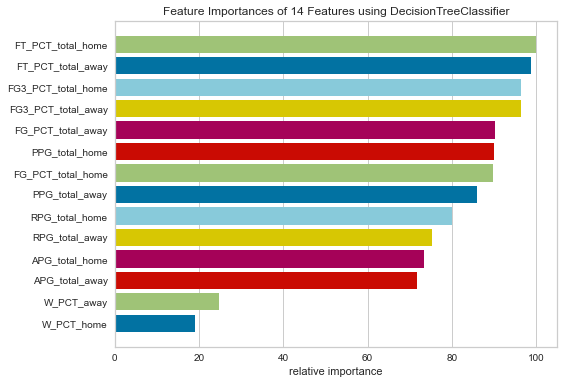

---------------------------------------------
Mean accuracy: 0.6354095218604369
Max accuracy: 0.6411131530585455
Min accuracy: 0.6272965879265092
i=5
FGP:

Best decision tree accuracy ({'max_features': 9, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.62      0.59      1777
           1       0.58      0.53      0.56      1777

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



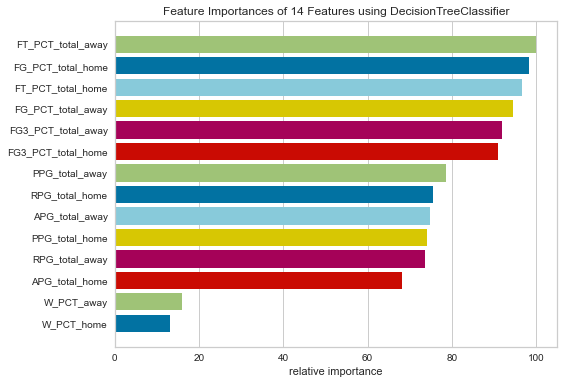

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_features': 9, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.63      0.60      1795
           1       0.59      0.53      0.56      1759

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



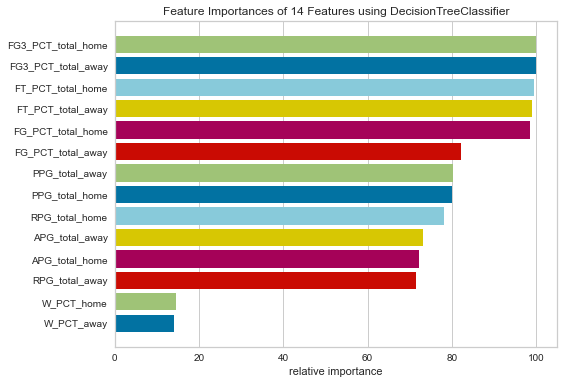

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.63      0.60      1785
           1       0.59      0.54      0.56      1769

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



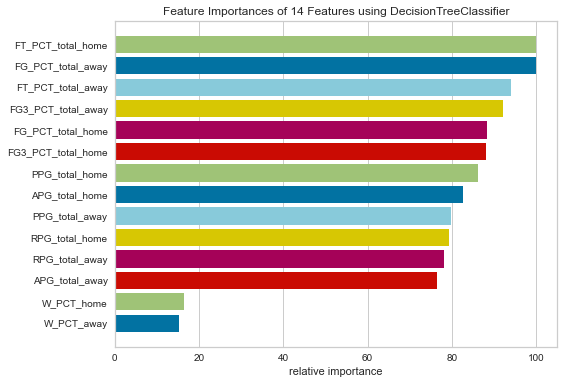

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.60      0.58      1743
           1       0.58      0.54      0.56      1810

    accuracy                           0.57      3553
   macro avg       0.57      0.57      0.57      3553
weighted avg       0.57      0.57      0.57      3553



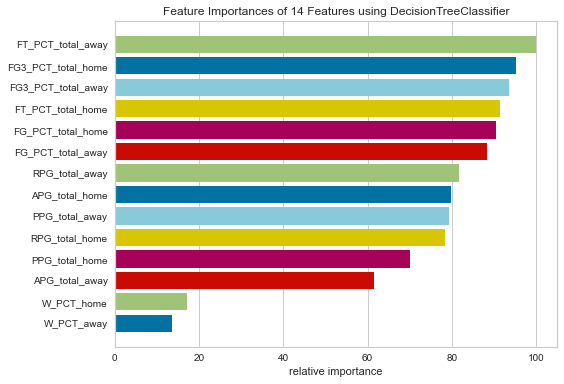

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_features': None, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.60      0.59      1784
           1       0.58      0.55      0.56      1769

    accuracy                           0.58      3553
   macro avg       0.58      0.58      0.57      3553
weighted avg       0.58      0.58      0.57      3553



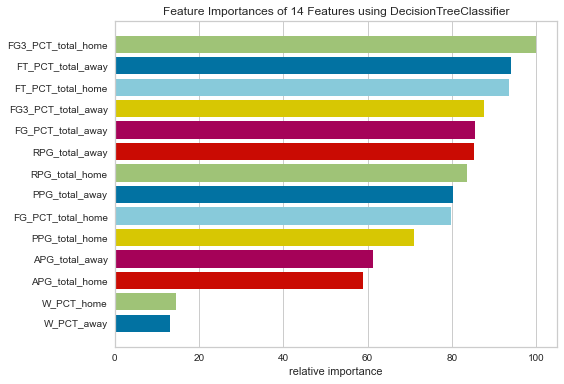

---------------------------------------------
Mean accuracy: 0.5779804008153089
Max accuracy: 0.5830050647158131
Min accuracy: 0.569377990430622
i=10
FG3:

Best decision tree accuracy ({'max_features': 3, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.50      0.50      1655
           1       0.49      0.51      0.50      1605

    accuracy                           0.50      3260
   macro avg       0.50      0.50      0.50      3260
weighted avg       0.50      0.50      0.50      3260



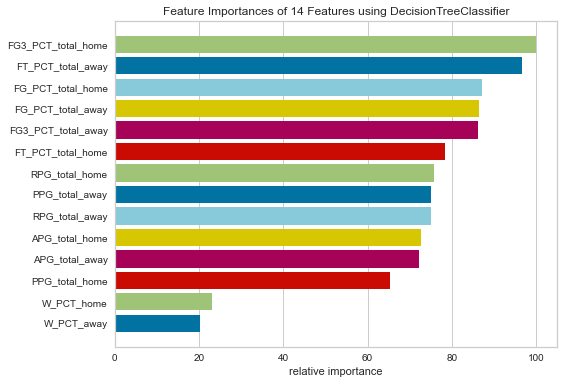

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_features': 5, 'criterion': 'entropy'}): 0.53
              precision    recall  f1-score   support

           0       0.51      0.54      0.52      1581
           1       0.54      0.51      0.53      1678

    accuracy                           0.53      3259
   macro avg       0.53      0.53      0.53      3259
weighted avg       0.53      0.53      0.53      3259



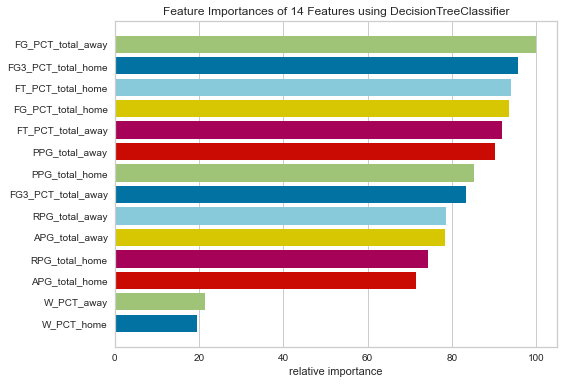

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1667
           1       0.49      0.49      0.49      1592

    accuracy                           0.50      3259
   macro avg       0.50      0.50      0.50      3259
weighted avg       0.50      0.50      0.50      3259



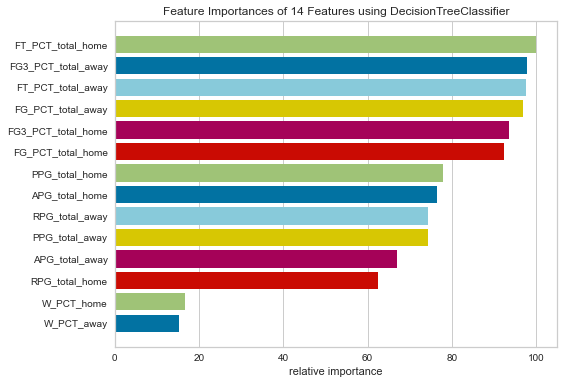

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_features': 'log2', 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      1618
           1       0.51      0.51      0.51      1641

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



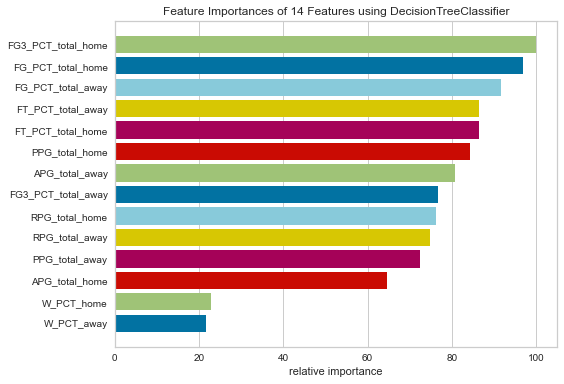

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_features': 6, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1627
           1       0.52      0.53      0.53      1632

    accuracy                           0.52      3259
   macro avg       0.52      0.52      0.52      3259
weighted avg       0.52      0.52      0.52      3259



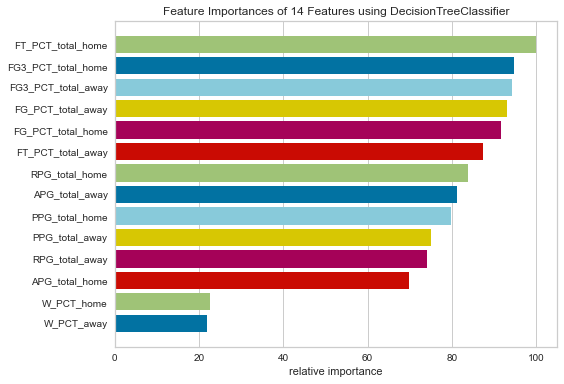

---------------------------------------------
Mean accuracy: 0.5089366727721439
Max accuracy: 0.5256213562442467
Min accuracy: 0.50107394906413
i=15
FT:

Best decision tree accuracy ({'max_features': None, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.50      0.50      1654
           1       0.49      0.50      0.50      1585

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.50      3239
weighted avg       0.50      0.50      0.50      3239



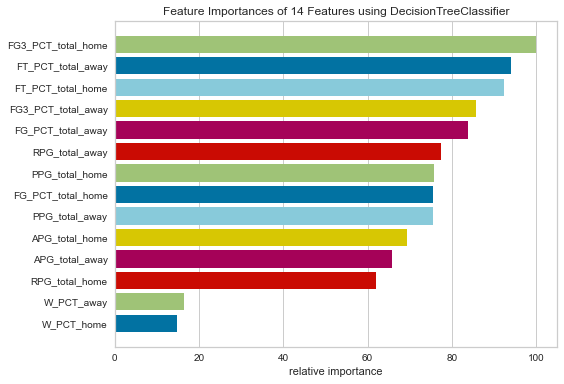

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_features': 3, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1604
           1       0.51      0.52      0.51      1635

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.50      3239
weighted avg       0.50      0.50      0.50      3239



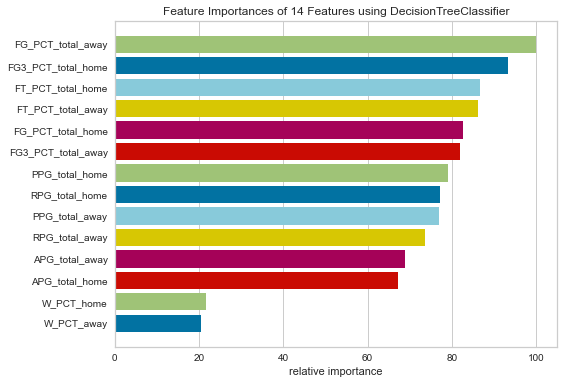

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_features': 6, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.50      0.51      1647
           1       0.51      0.53      0.52      1591

    accuracy                           0.51      3238
   macro avg       0.52      0.52      0.51      3238
weighted avg       0.52      0.51      0.51      3238



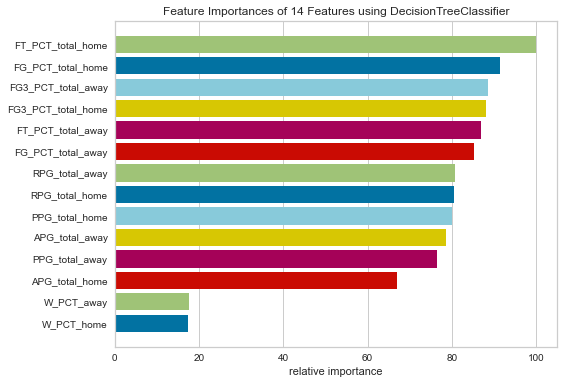

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1625
           1       0.51      0.51      0.51      1613

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.51      3238
weighted avg       0.51      0.51      0.51      3238



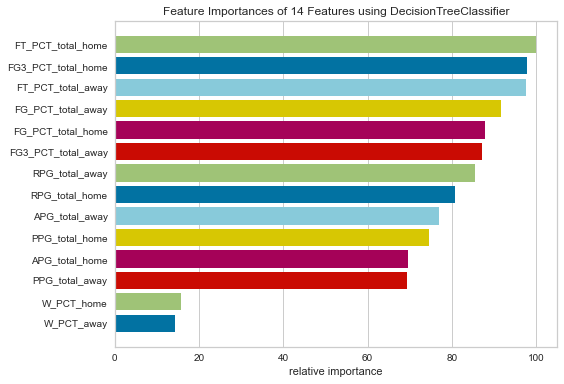

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_features': 6, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1566
           1       0.53      0.52      0.53      1672

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



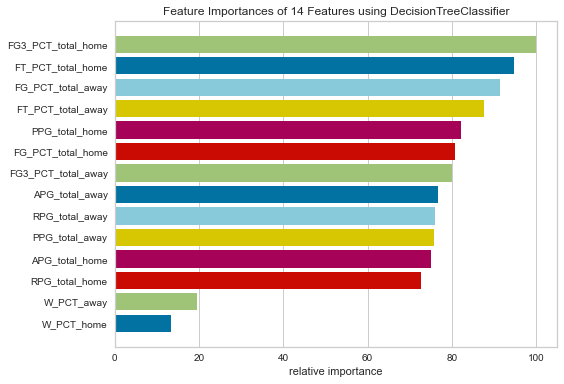

---------------------------------------------
Mean accuracy: 0.5073343693226144
Max accuracy: 0.5148239654107474
Min accuracy: 0.5007718431614696
i=20
AST:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.58      0.59      0.58      1810
           1       0.56      0.55      0.55      1706

    accuracy                           0.57      3516
   macro avg       0.57      0.57      0.57      3516
weighted avg       0.57      0.57      0.57      3516



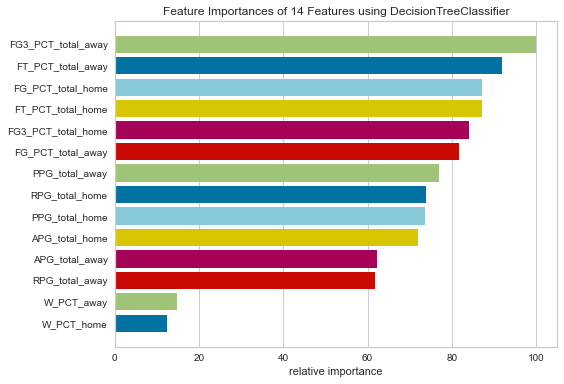

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_features': 1, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.61      0.60      1793
           1       0.57      0.54      0.56      1722

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



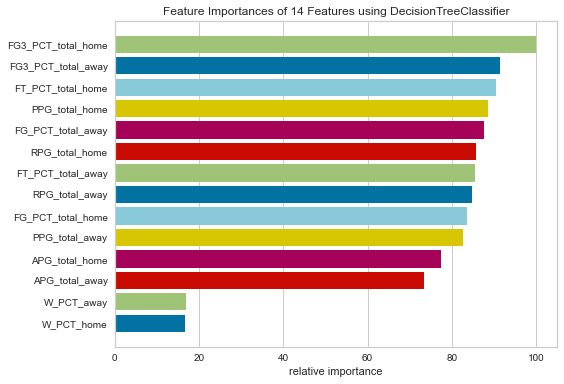

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_features': 'log2', 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.61      0.59      1750
           1       0.59      0.57      0.58      1765

    accuracy                           0.59      3515
   macro avg       0.59      0.59      0.59      3515
weighted avg       0.59      0.59      0.59      3515



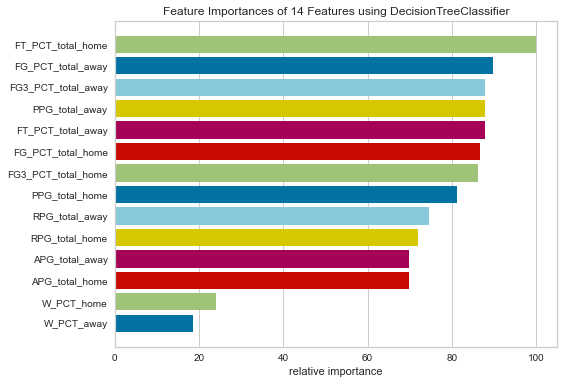

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.61      0.58      1720
           1       0.59      0.54      0.57      1795

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.57      0.57      0.57      3515



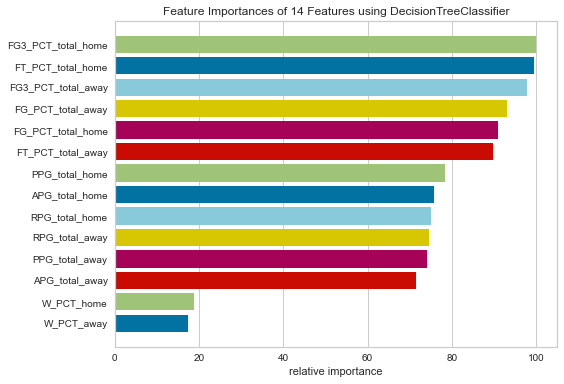

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_features': 3, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.61      0.58      1715
           1       0.59      0.54      0.56      1800

    accuracy                           0.57      3515
   macro avg       0.58      0.57      0.57      3515
weighted avg       0.58      0.57      0.57      3515



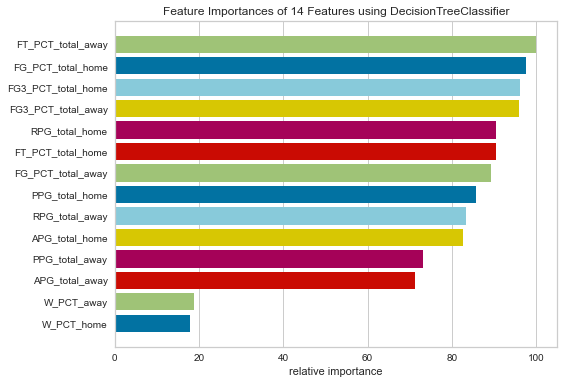

---------------------------------------------
Mean accuracy: 0.5771999208657194
Max accuracy: 0.5871977240398293
Min accuracy: 0.5691126279863481
i=25
REB:

Best decision tree accuracy ({'max_features': 4, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.58      0.57      1739
           1       0.54      0.52      0.53      1682

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



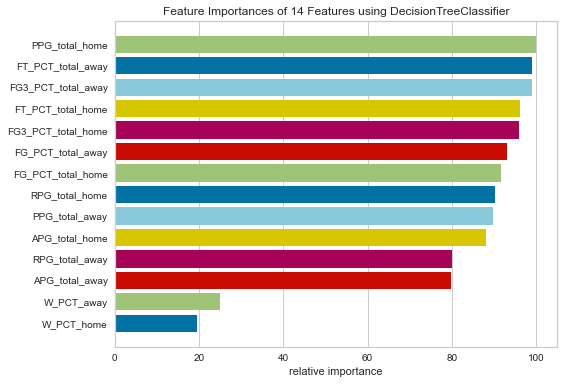

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1725
           1       0.55      0.52      0.53      1696

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



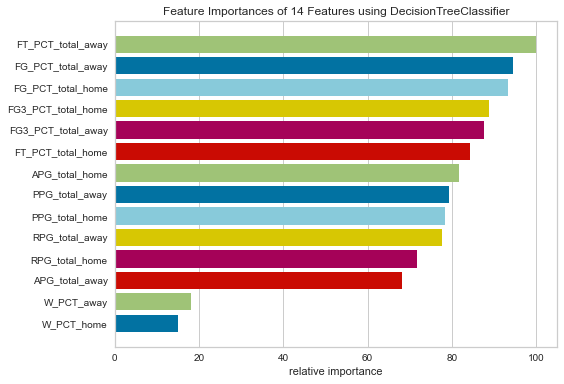

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_features': 'sqrt', 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1710
           1       0.55      0.53      0.54      1711

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



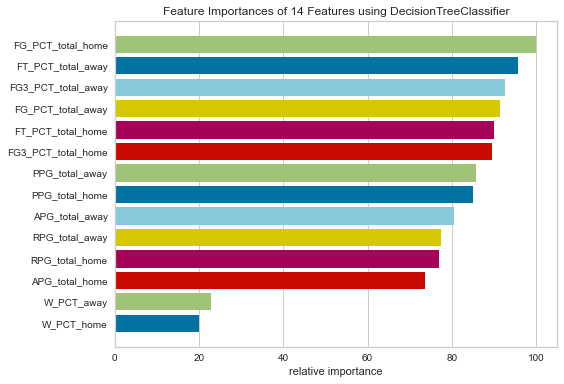

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_features': 5, 'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.55      0.60      0.57      1668
           1       0.58      0.52      0.55      1753

    accuracy                           0.56      3421
   macro avg       0.56      0.56      0.56      3421
weighted avg       0.56      0.56      0.56      3421



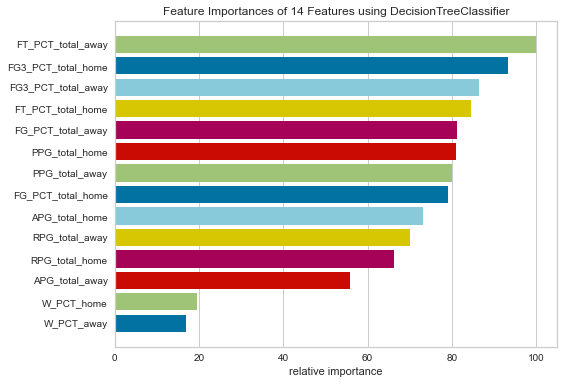

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_features': 1, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1710
           1       0.56      0.53      0.54      1710

    accuracy                           0.56      3420
   macro avg       0.56      0.56      0.56      3420
weighted avg       0.56      0.56      0.56      3420



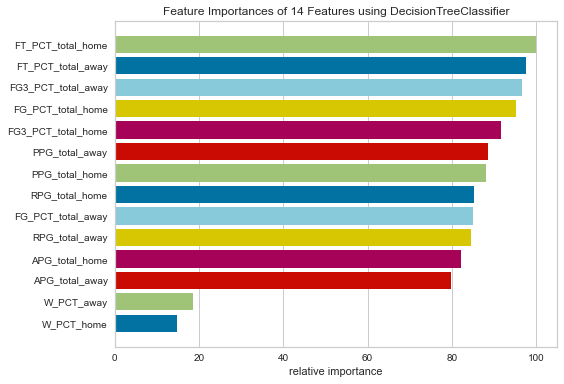

---------------------------------------------
Mean accuracy: 0.5514469453376205
Max accuracy: 0.5618240280619702
Min accuracy: 0.5472084185910553


In [33]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
})

## Try class weight balance

i=0


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      1928
           1       0.64      0.56      0.60      1882

    accuracy                           0.63      3810
   macro avg       0.63      0.63      0.63      3810
weighted avg       0.63      0.63      0.63      3810



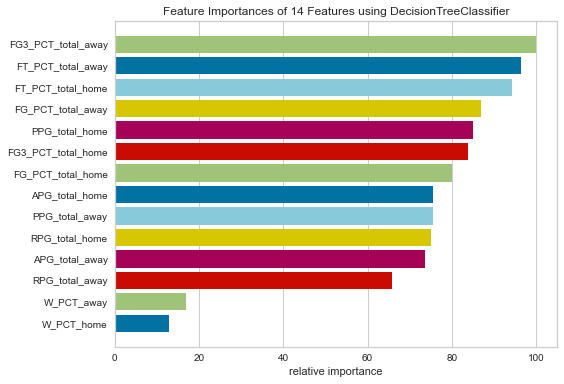

---------------------------------------------
i=1


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.70      0.65      1884
           1       0.65      0.56      0.60      1926

    accuracy                           0.63      3810
   macro avg       0.63      0.63      0.63      3810
weighted avg       0.63      0.63      0.63      3810



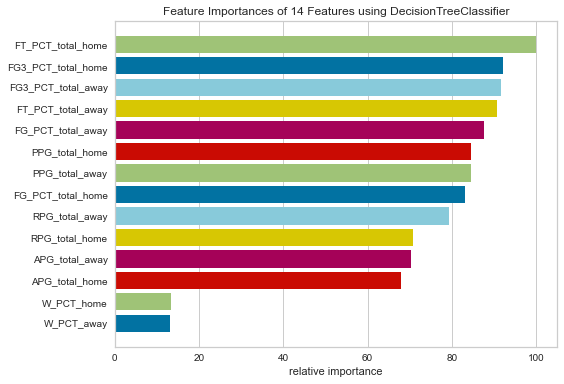

---------------------------------------------
i=2


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.69      0.66      1934
           1       0.64      0.57      0.60      1876

    accuracy                           0.63      3810
   macro avg       0.63      0.63      0.63      3810
weighted avg       0.63      0.63      0.63      3810



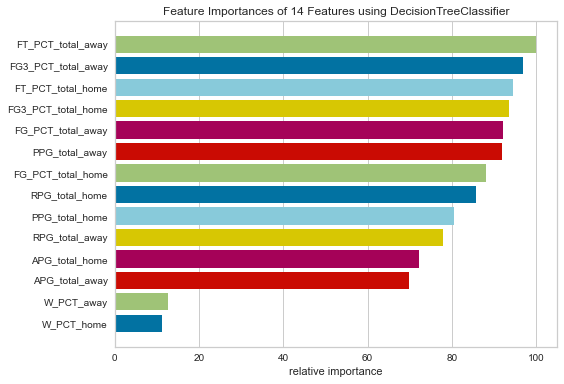

---------------------------------------------
i=3


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.64
              precision    recall  f1-score   support

           0       0.61      0.71      0.66      1855
           1       0.68      0.57      0.62      1954

    accuracy                           0.64      3809
   macro avg       0.64      0.64      0.64      3809
weighted avg       0.65      0.64      0.64      3809



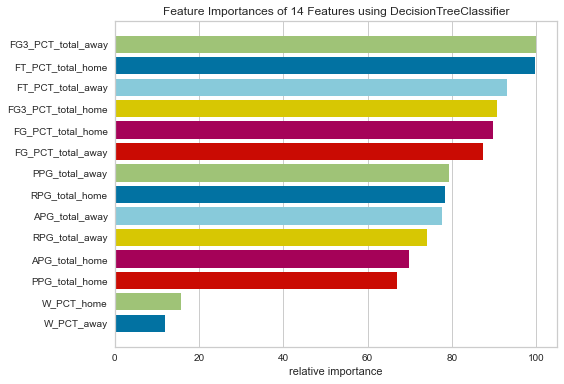

---------------------------------------------
i=4


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1923
           1       0.66      0.59      0.62      1886

    accuracy                           0.65      3809
   macro avg       0.65      0.65      0.65      3809
weighted avg       0.65      0.65      0.65      3809



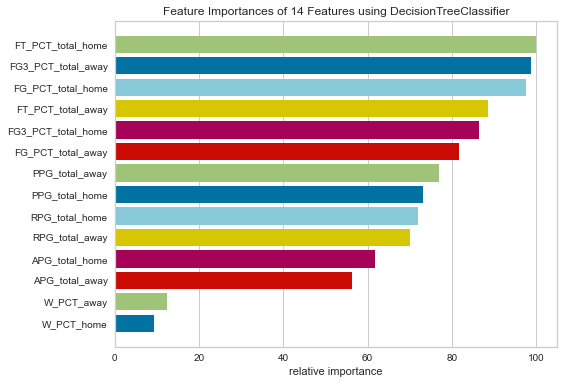

---------------------------------------------
Mean accuracy: 0.6321942470829897
Max accuracy: 0.6403255447624049
Min accuracy: 0.6283464566929133
i=5


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.60
              precision    recall  f1-score   support

           0       0.59      0.64      0.62      1777
           1       0.61      0.56      0.58      1777

    accuracy                           0.60      3554
   macro avg       0.60      0.60      0.60      3554
weighted avg       0.60      0.60      0.60      3554



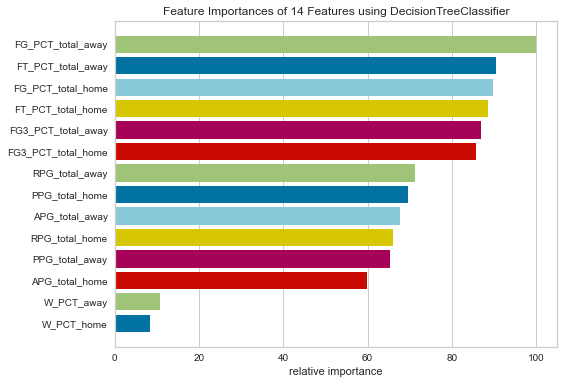

---------------------------------------------
i=6


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1795
           1       0.58      0.54      0.56      1759

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



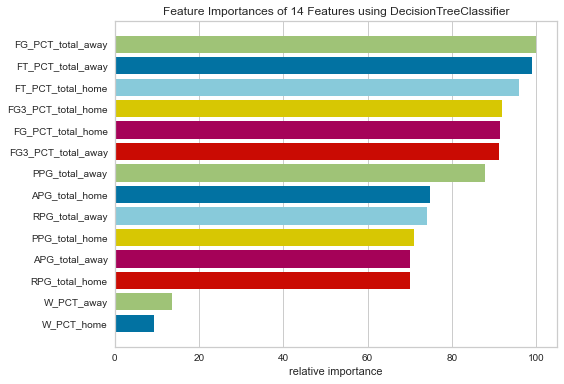

---------------------------------------------
i=7


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.57
              precision    recall  f1-score   support

           0       0.57      0.60      0.59      1785
           1       0.58      0.54      0.56      1769

    accuracy                           0.57      3554
   macro avg       0.57      0.57      0.57      3554
weighted avg       0.57      0.57      0.57      3554



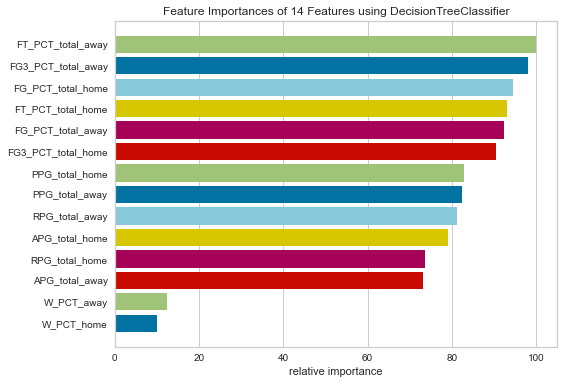

---------------------------------------------
i=8


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.57
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      1743
           1       0.58      0.52      0.55      1810

    accuracy                           0.57      3553
   macro avg       0.57      0.57      0.57      3553
weighted avg       0.57      0.57      0.57      3553



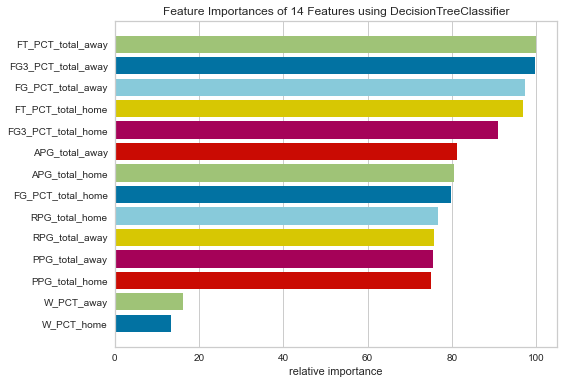

---------------------------------------------
i=9


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.62      0.60      1784
           1       0.58      0.53      0.55      1769

    accuracy                           0.58      3553
   macro avg       0.58      0.58      0.57      3553
weighted avg       0.58      0.58      0.57      3553



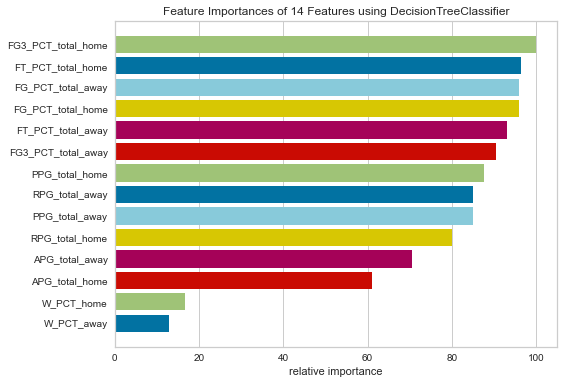

---------------------------------------------
Mean accuracy: 0.5798091675838548
Max accuracy: 0.6018570624648284
Min accuracy: 0.5671263720799324
i=10


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.54      0.54      1655
           1       0.52      0.50      0.51      1605

    accuracy                           0.52      3260
   macro avg       0.52      0.52      0.52      3260
weighted avg       0.52      0.52      0.52      3260



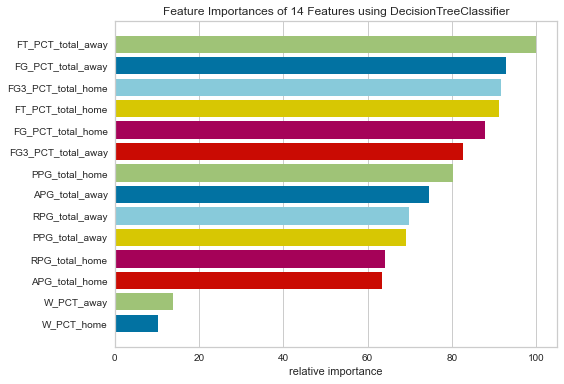

---------------------------------------------
i=11


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.51
              precision    recall  f1-score   support

           0       0.49      0.52      0.51      1581
           1       0.53      0.50      0.51      1678

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



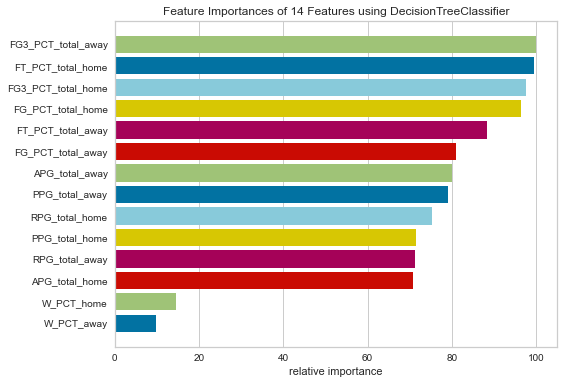

---------------------------------------------
i=12


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.51      0.52      1667
           1       0.50      0.53      0.52      1592

    accuracy                           0.52      3259
   macro avg       0.52      0.52      0.52      3259
weighted avg       0.52      0.52      0.52      3259



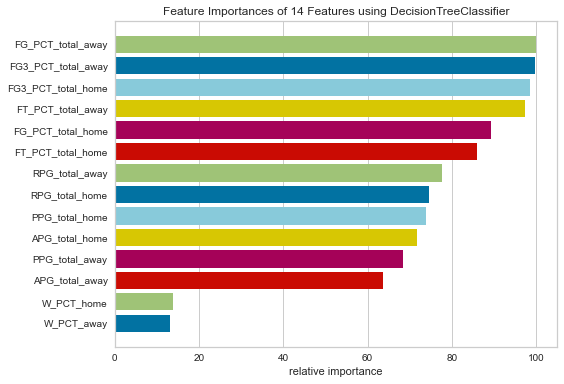

---------------------------------------------
i=13


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1618
           1       0.52      0.52      0.52      1641

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



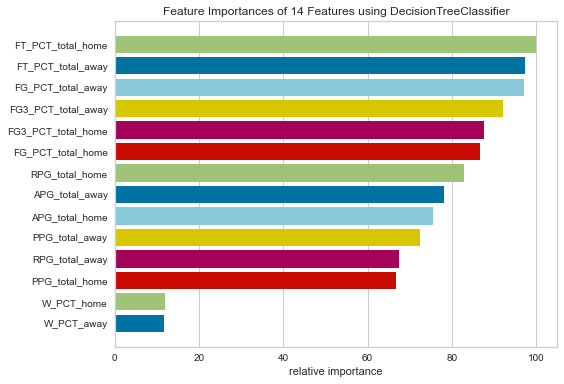

---------------------------------------------
i=14


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.53
              precision    recall  f1-score   support

           0       0.53      0.54      0.53      1627
           1       0.53      0.52      0.52      1632

    accuracy                           0.53      3259
   macro avg       0.53      0.53      0.53      3259
weighted avg       0.53      0.53      0.53      3259



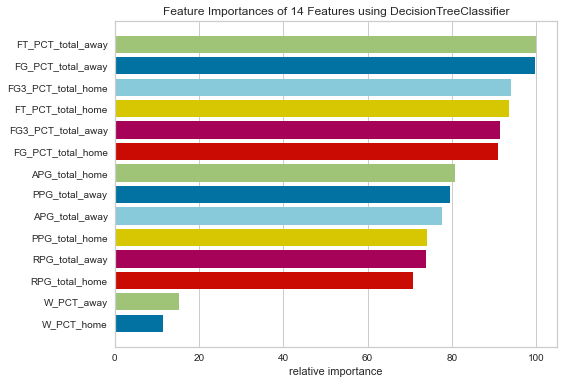

---------------------------------------------
Mean accuracy: 0.5159156945278484
Max accuracy: 0.5230061349693251
Min accuracy: 0.5096655415771709
i=15


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      1654
           1       0.49      0.50      0.49      1585

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.50      3239
weighted avg       0.50      0.50      0.50      3239



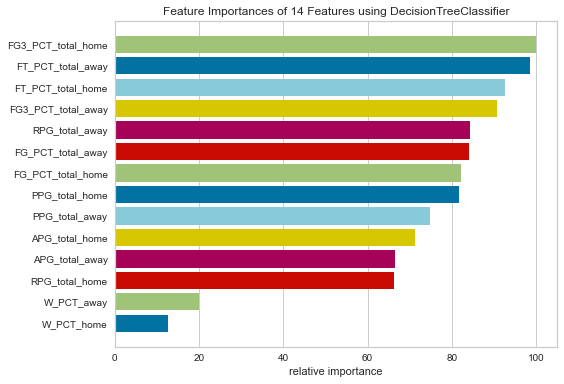

---------------------------------------------
i=16


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.49
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      1604
           1       0.50      0.50      0.50      1635

    accuracy                           0.49      3239
   macro avg       0.49      0.49      0.49      3239
weighted avg       0.49      0.49      0.49      3239



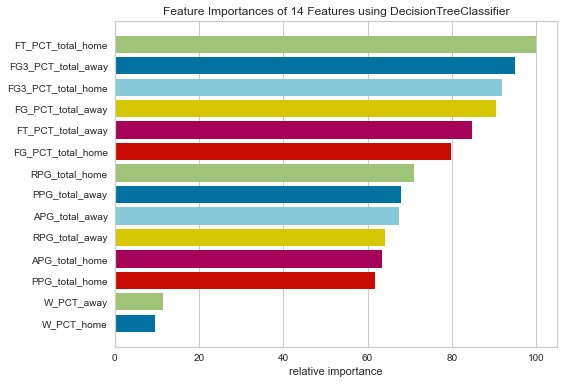

---------------------------------------------
i=17


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.51      0.52      1647
           1       0.51      0.52      0.52      1591

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



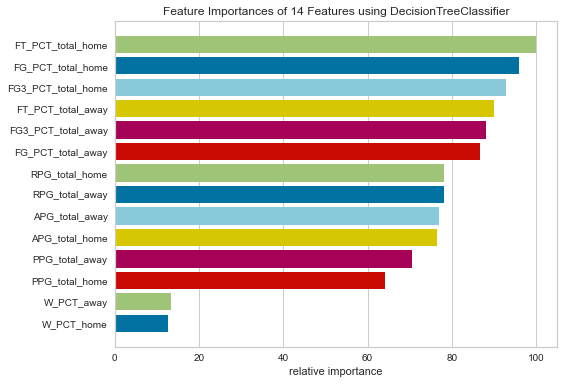

---------------------------------------------
i=18


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.52
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1625
           1       0.52      0.53      0.52      1613

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



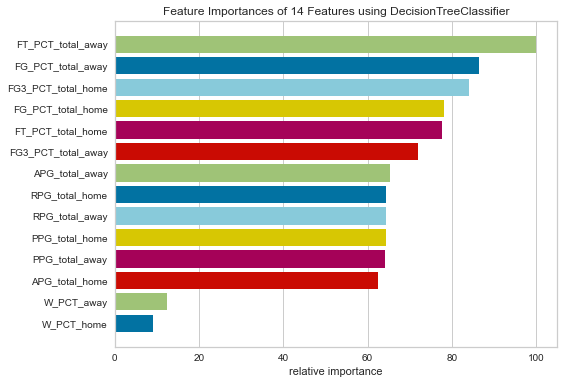

---------------------------------------------
i=19


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.50
              precision    recall  f1-score   support

           0       0.49      0.52      0.50      1566
           1       0.52      0.49      0.51      1672

    accuracy                           0.50      3238
   macro avg       0.51      0.51      0.50      3238
weighted avg       0.51      0.50      0.50      3238



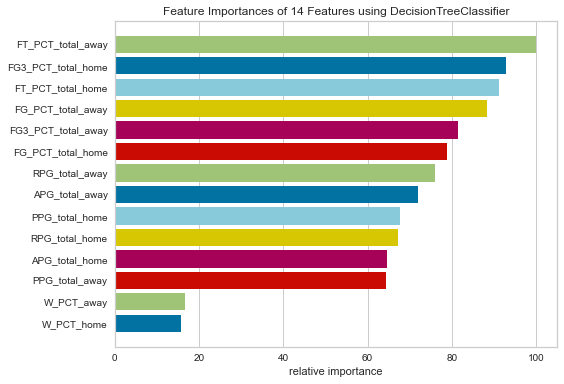

---------------------------------------------
Mean accuracy: 0.5077985717230609
Max accuracy: 0.5197652872143298
Min accuracy: 0.4930534115467737
i=20


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1810
           1       0.54      0.53      0.54      1706

    accuracy                           0.56      3516
   macro avg       0.55      0.55      0.55      3516
weighted avg       0.56      0.56      0.56      3516



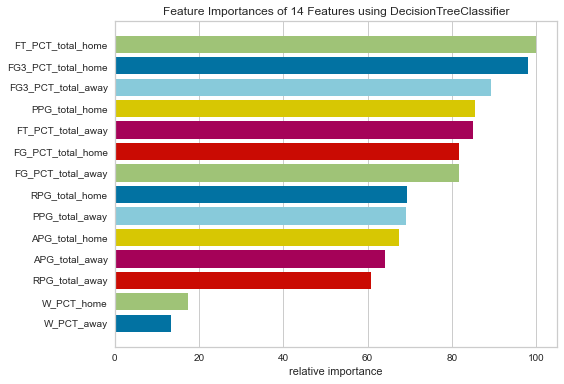

---------------------------------------------
i=21


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.62      0.59      1793
           1       0.56      0.51      0.53      1722

    accuracy                           0.56      3515
   macro avg       0.56      0.56      0.56      3515
weighted avg       0.56      0.56      0.56      3515



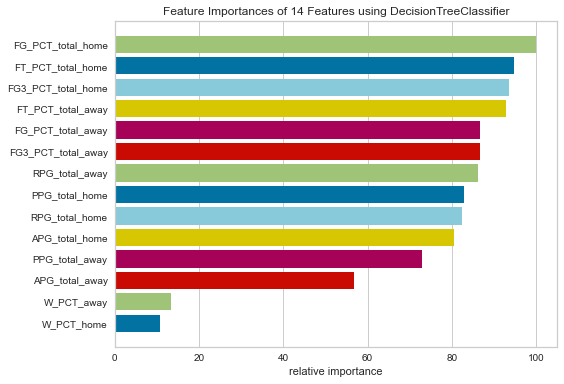

---------------------------------------------
i=22


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.59      0.58      1750
           1       0.57      0.55      0.56      1765

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.57      0.57      0.57      3515



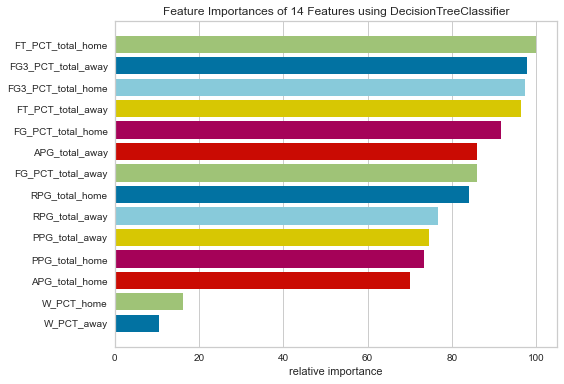

---------------------------------------------
i=23


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.60      0.58      1720
           1       0.59      0.55      0.57      1795

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.57      0.57      0.57      3515



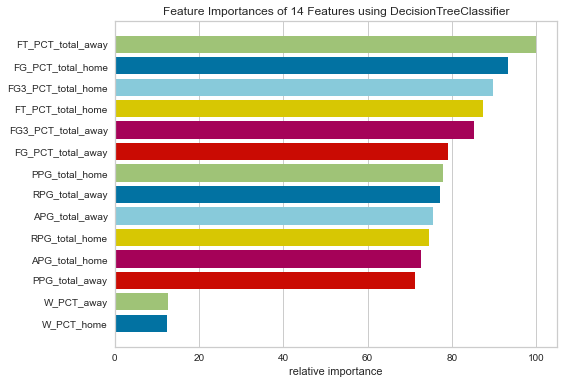

---------------------------------------------
i=24


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.61      0.58      1715
           1       0.59      0.54      0.56      1800

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.58      0.57      0.57      3515



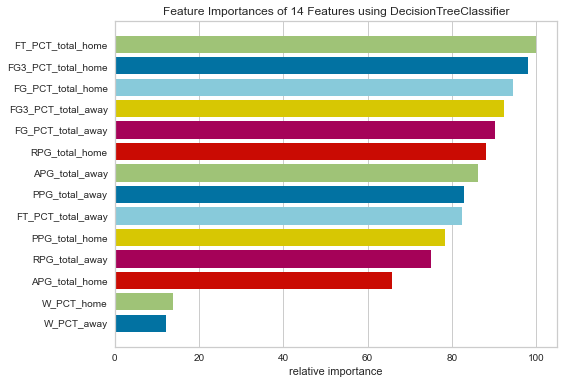

---------------------------------------------
Mean accuracy: 0.5647542346549891
Max accuracy: 0.5735419630156472
Min accuracy: 0.5554607508532423
i=25


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.54
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1739
           1       0.54      0.52      0.53      1682

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



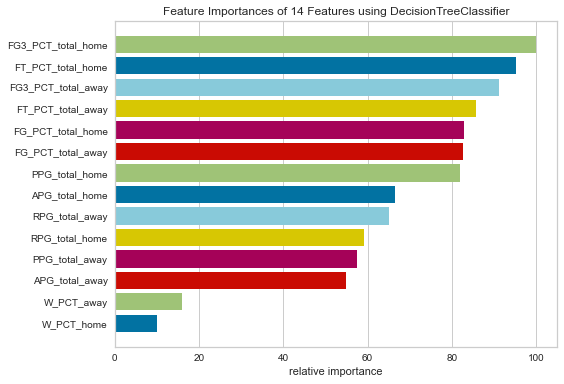

---------------------------------------------
i=26


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1725
           1       0.55      0.53      0.54      1696

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



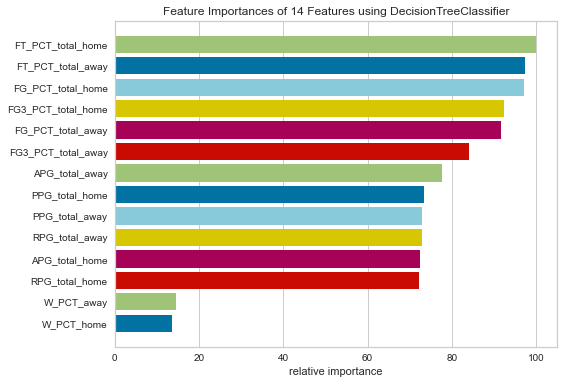

---------------------------------------------
i=27


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.55      0.54      1710
           1       0.54      0.52      0.53      1711

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



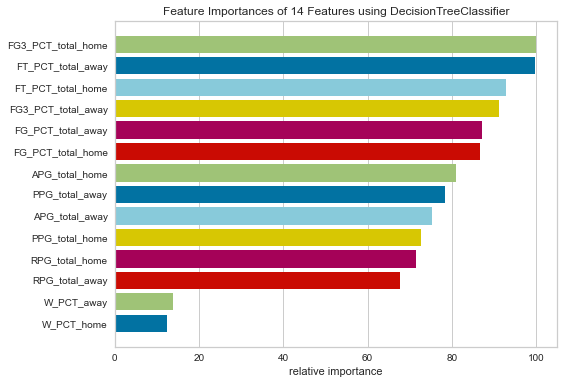

---------------------------------------------
i=28


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.56
              precision    recall  f1-score   support

           0       0.54      0.60      0.57      1668
           1       0.57      0.51      0.54      1753

    accuracy                           0.56      3421
   macro avg       0.56      0.56      0.55      3421
weighted avg       0.56      0.56      0.55      3421



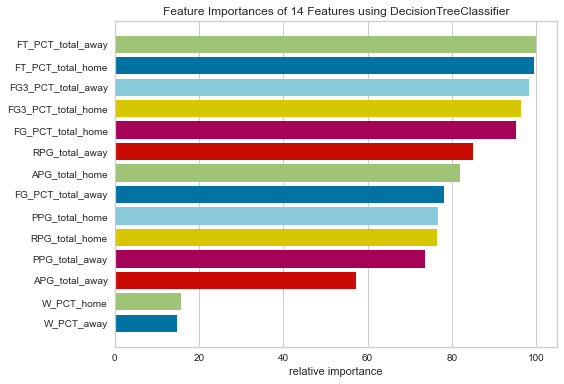

---------------------------------------------
i=29


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.58      0.56      1710
           1       0.55      0.51      0.53      1710

    accuracy                           0.54      3420
   macro avg       0.54      0.54      0.54      3420
weighted avg       0.54      0.54      0.54      3420



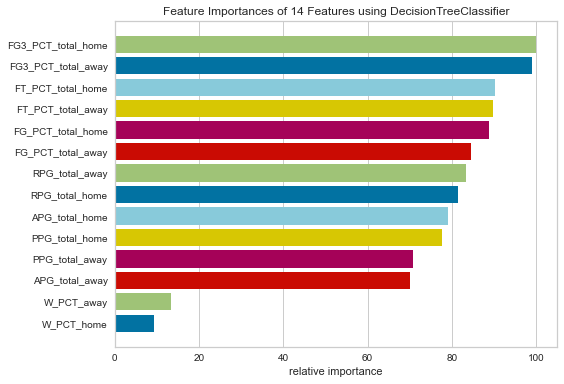

---------------------------------------------
Mean accuracy: 0.5466237942122186
Max accuracy: 0.5553931598947676
Min accuracy: 0.5384390529085062


In [34]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'class_weight': ['balanced', None],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
})